# 04.02 - Exploratory Data Analysis - Full Notebook

## Imports & setup

In [1]:
import pathlib
import datetime
from os import PathLike
from typing import Union

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import palettable
import seaborn as sns
%matplotlib inline

PROJECT_DIR = pathlib.Path.cwd().parent.resolve()
CLEAN_DATA_DIR = PROJECT_DIR / 'data' / '05-clean'

plt.style.use('grayscale')
# Custom Overrides to grayscale
params = {'legend.fontsize': 'x-large',
          'lines.linewidth': 0.75,
      'figure.figsize': (15, 7),
          'grid.color': 'white',
          'axes.axisbelow': False,
          'axes.grid': True,
          'axes.grid.axis': 'y',
     'axes.labelsize': 'x-large',
     'axes.titlesize':'xx-large',
     'xtick.labelsize':'x-large',
     'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
figsize=(15,7)

## Load Data

In [2]:
dtypes = {'temp': np.float64, 'dew_point_temp':np.float64, 'rel_hum':np.float64,
          'wind_speed': np.float64, 'visibility': np.float64, 'press': np.float64,
          'hmdx': np.float64, 'wind_chill': np.float64, 'weather': np.object,
         'hour_of_day': np.float64, 'year': np.float64, 'month': np.float64,
         'day_of_week': np.float64, 'day_of_year': np.float64, 'week_of_year': np.float64,
          'quarter': np.float64, 'stat_hol': 'category', 'day_light_hours': 'category',
          'hourly_demand': np.float64, 'daily_peak': np.float64}

df_orig = pd.read_csv(CLEAN_DATA_DIR / "clean-cut.csv", parse_dates=True,
                 dtype=dtypes, index_col=0, infer_datetime_format=True)

daymapper = {0.0: 'Mon', 1.0: 'Tue', 2.0: 'Wed', 3.0: 'Thu', 4.0: 'Fri', 5.0: 'Sat', 6.0: 'Sun'}
weekdaymapper = {0.0: 'Weekday', 1.0: 'Weekday', 2.0: 'Weekday', 3.0: 'Weekday', 4.0: 'Weekday',
                 5.0: 'Weekend', 6.0: 'Weekend'}
df_orig['dayofweek'] = df_orig['day_of_week'].map(daymapper)
df_orig['daytype'] = df_orig['day_of_week'].map(weekdaymapper)


In [3]:
df_orig.head()

temp  dew_point_temp  rel_hum  wind_speed  visibility  \
1994-01-01 00:00:00  -1.2            -3.8     83.0        15.0        19.3   
1994-01-01 01:00:00  -0.9            -3.0     86.0        20.0        16.1   
1994-01-01 02:00:00  -0.7            -3.2     83.0        15.0        16.1   
1994-01-01 03:00:00  -0.8            -2.4     89.0        15.0        12.9   
1994-01-01 04:00:00  -1.0            -3.3     84.0        19.0        16.1   

                     press  hmdx  wind_chill        weather  hour_of_day  ...  \
1994-01-01 00:00:00  99.91   NaN        -6.0         Cloudy          0.0  ...   
1994-01-01 01:00:00  99.91   NaN        -6.0         Cloudy          1.0  ...   
1994-01-01 02:00:00  99.87   NaN        -5.0         Cloudy          2.0  ...   
1994-01-01 03:00:00  99.81   NaN        -5.0         Cloudy          3.0  ...   
1994-01-01 04:00:00  99.77   NaN        -6.0  Mostly Cloudy          4.0  ...   

                     day_of_week  day_of_year  week_of_year  quarter  \
1994-01-01 00:00:00          5.0          1.0          52.0      1.0   
1994-01-01 01:00:00          5.0          1.0          52.0      1.0   
1994-01-01 02:00:00          5.0          1.0          52.0      1.0   
1994-01-01 03:00:00          5.0          1.0          52.0      1.0   
1994-01-01 04:00:00          5.0          1.0          52.0      1.0   

                     stat_hol  day_light_hours hourly_demand daily_peak  \
1994-01-01 00:00:00      True            False       14422.0    16892.0   
1994-01-01 01:00:00      True            False       13845.0    16892.0   
1994-01-01 02:00:00      True            False       13372.0    16892.0   
1994-01-01 03:00:00      True            False       13025.0    16892.0   
1994-01-01 04:00:00      True            False       12869.0    16892.0   

                     dayofweek  daytype  
1994-01-01 00:00:00        Sat  Weekend  
1994-01-01 01:00:00        Sat  Weekend  
1994-01-01 02:00:00        Sat  Weekend  
1994-01-01 03:00:00        Sat  Weekend  
1994-01-01 04:00:00        Sat  Weekend  

[5 rows x 22 columns]

In [4]:
df_orig.tail()

temp  dew_point_temp  rel_hum  wind_speed  visibility  \
2018-12-31 19:00:00   2.5             1.0     90.0        19.0         9.7   
2018-12-31 20:00:00   2.9             1.6     92.0        21.0         9.7   
2018-12-31 21:00:00   3.7             2.6     93.0        21.0         9.7   
2018-12-31 22:00:00   4.0             3.0     93.0        18.0         6.4   
2018-12-31 23:00:00   4.3             3.4     94.0        12.0         9.7   

                     press  hmdx  wind_chill   weather  hour_of_day  ...  \
2018-12-31 19:00:00  98.51   NaN         NaN  Rain,Fog         19.0  ...   
2018-12-31 20:00:00  98.17   NaN         NaN  Rain,Fog         20.0  ...   
2018-12-31 21:00:00  97.98   NaN         NaN  Rain,Fog         21.0  ...   
2018-12-31 22:00:00  97.61   NaN         NaN  Rain,Fog         22.0  ...   
2018-12-31 23:00:00  97.37   NaN         NaN  Rain,Fog         23.0  ...   

                     day_of_week  day_of_year  week_of_year  quarter  \
2018-12-31 19:00:00          0.0        365.0           1.0      4.0   
2018-12-31 20:00:00          0.0        365.0           1.0      4.0   
2018-12-31 21:00:00          0.0        365.0           1.0      4.0   
2018-12-31 22:00:00          0.0        365.0           1.0      4.0   
2018-12-31 23:00:00          0.0        365.0           1.0      4.0   

                     stat_hol  day_light_hours hourly_demand daily_peak  \
2018-12-31 19:00:00     False            False       16195.0    17125.0   
2018-12-31 20:00:00     False            False       15668.0    17125.0   
2018-12-31 21:00:00     False            False       14987.0    17125.0   
2018-12-31 22:00:00     False            False       14560.0    17125.0   
2018-12-31 23:00:00     False            False       13828.0    17125.0   

                     dayofweek  daytype  
2018-12-31 19:00:00        Mon  Weekday  
2018-12-31 20:00:00        Mon  Weekday  
2018-12-31 21:00:00        Mon  Weekday  
2018-12-31 22:00:00        Mon  Weekday  
2018-12-31 23:00:00        Mon  Weekday  

[5 rows x 22 columns]

In [5]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 219144 entries, 1994-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 22 columns):
temp               219144 non-null float64
dew_point_temp     219144 non-null float64
rel_hum            219144 non-null float64
wind_speed         219144 non-null float64
visibility         219144 non-null float64
press              219144 non-null float64
hmdx               34073 non-null float64
wind_chill         48918 non-null float64
weather            191377 non-null object
hour_of_day        219144 non-null float64
year               219144 non-null float64
month              219144 non-null float64
day_of_week        219144 non-null float64
day_of_year        219144 non-null float64
week_of_year       219144 non-null float64
quarter            219144 non-null float64
stat_hol           219144 non-null category
day_light_hours    219144 non-null category
hourly_demand      219144 non-null float64
daily_peak         219144 non-null floa

In [6]:
for col in df_orig.columns:
    print(col)

temp
dew_point_temp
rel_hum
wind_speed
visibility
press
hmdx
wind_chill
weather
hour_of_day
year
month
day_of_week
day_of_year
week_of_year
quarter
stat_hol
day_light_hours
hourly_demand
daily_peak
dayofweek
daytype


## Demand Overview

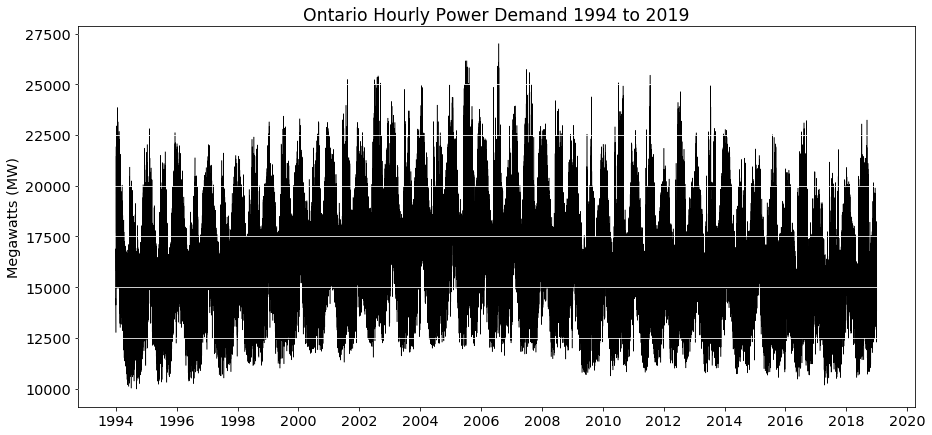

In [7]:
df = df_orig.copy(deep=True)
def single_time_series_plot(some_series: pd.Series, date_format: str, mdates_locator):
    myFmt = DateFormatter(date_format) 

    fig, ax1 = plt.subplots(frameon=False, figsize=figsize)
    ax1.plot(some_series, linewidth=0.5)
    ax1.xaxis.set_major_formatter(myFmt)
    ax1.xaxis.set_major_locator(mdates_locator)
    return fig, ax1

date_format = '%Y'
mdates_locator = mdates.YearLocator(2)
df = df['hourly_demand']
fig, ax = single_time_series_plot(df,
                                  date_format=date_format,
                                  mdates_locator=mdates_locator)
ax.set_title('Ontario Hourly Power Demand 1994 to 2019')
ax.set_ylabel('Megawatts (MW)')
plt.savefig('saved-images/ontario-hourly-power-demand-1994-2019.PNG')
plt.show();

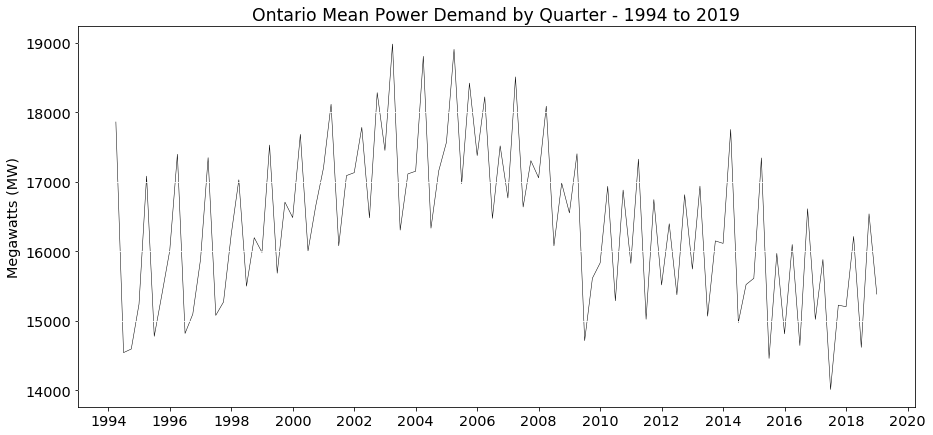

In [8]:
df = df_orig.copy(deep=True)
date_format = '%Y'
mdates_locator = mdates.YearLocator(2)
df = df['hourly_demand'].resample('Q').mean()
fig, ax = single_time_series_plot(df,
                                  date_format=date_format,
                                  mdates_locator=mdates_locator)
ax.set_title('Ontario Mean Power Demand by Quarter - 1994 to 2019')
ax.set_ylabel('Megawatts (MW)')
plt.savefig('saved-images/ontario-mean-quarterly-power-demand-1994-2019.PNG')
plt.show();

## Weather Overview

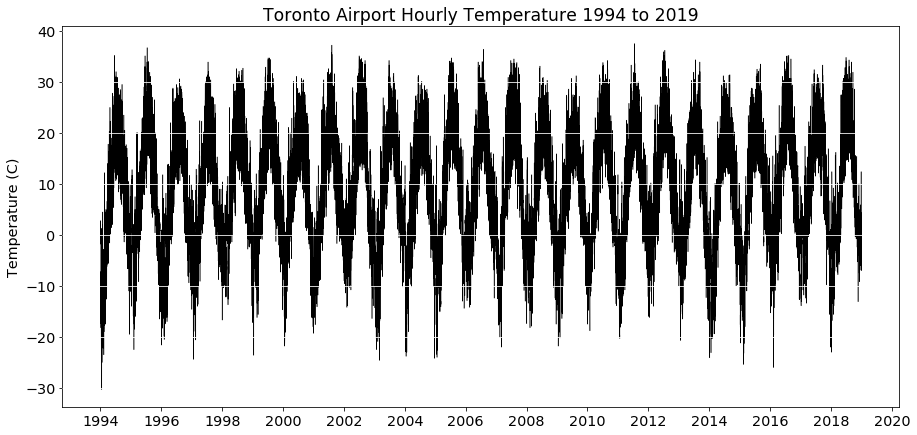

In [9]:
df = df_orig.copy(deep=True)
date_format = '%Y'
mdates_locator = mdates.YearLocator(2)
df = df['temp']
fig, ax = single_time_series_plot(df,
                                  date_format=date_format,
                                  mdates_locator=mdates_locator)
ax.set_title('Toronto Airport Hourly Temperature 1994 to 2019')
ax.set_ylabel('Temperature (C)')
plt.savefig('saved-images/toronto-airport-hourly-temperature-1994-20192.PNG')
plt.show();

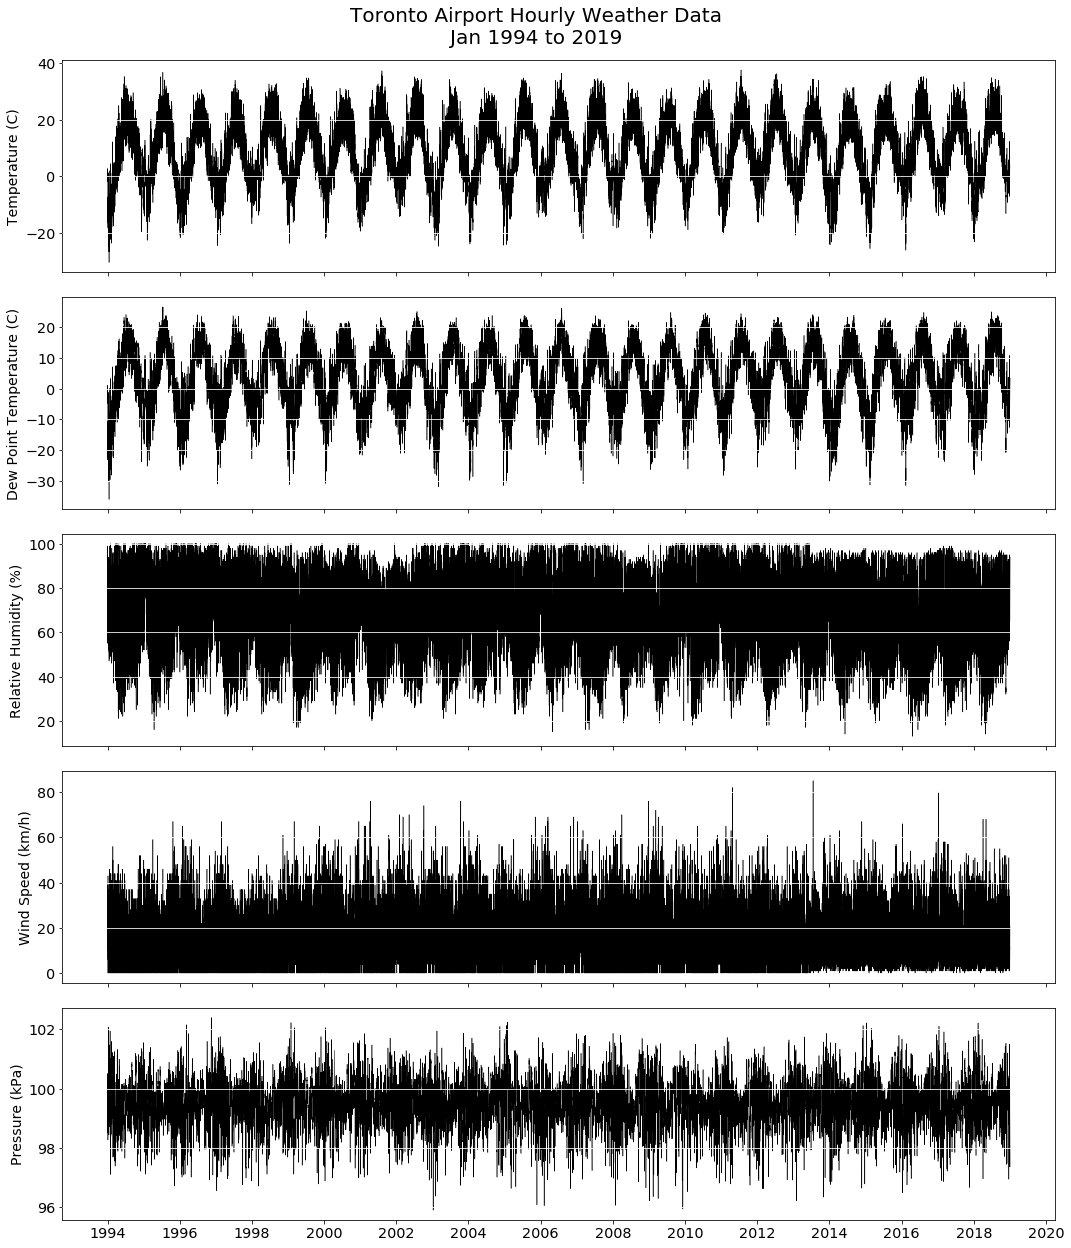

In [10]:
df = df_orig.copy(deep=True)
def multi_time_series_plot(df: pd.DataFrame, date_format: str, mdates_locator, ylabels):
    myFmt = DateFormatter(date_format) 

    fig, axes = plt.subplots(nrows=len(df.columns), ncols=1,
                             frameon=False,
                             figsize = (figsize[0], figsize[1]*2.6),
                            sharex=True)
    for ax, col, ylabel in zip(axes, df.columns, ylabels):
        ax.plot(df[col], linewidth=0.5)
        ax.set_ylabel(ylabel, fontsize=14)
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_major_locator(mdates_locator)
    ax.xaxis.set_tick_params(labelbottom=True)
    return fig, axes

date_format = '%Y'
mdates_locator = mdates.YearLocator(2)
df = df[['temp', 'dew_point_temp', 'rel_hum', 'wind_speed', 'press']]
ylabels = ['Temperature (C)', 'Dew Point Temperature (C)',
           'Relative Humidity (%)', 'Wind Speed (km/h)',
          'Pressure (kPa)']
fig, axes = multi_time_series_plot(df,
                                  date_format=date_format,
                                  mdates_locator=mdates_locator, ylabels=ylabels)
plt.suptitle('Toronto Airport Hourly Weather Data\nJan 1994 to 2019', fontsize=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('saved-images/toronto-airport-hourly-weather-data-1994-2019.PNG')
plt.show();

## Select an Arbitrary Year and Examine Relationships

### Data for Every Hour in 2006

In [11]:
pd.set_option('display.max_columns', 100)

df2006 = df_orig.loc['2006', :].copy(deep=True)
df2006.head()

temp  dew_point_temp  rel_hum  wind_speed  visibility  \
2006-01-01 00:00:00  -5.2            -7.4     84.0         7.0        19.3   
2006-01-01 01:00:00  -5.0            -7.0     86.0         0.0        19.3   
2006-01-01 02:00:00  -5.4            -6.3     93.0         4.0         4.0   
2006-01-01 03:00:00  -5.0            -5.6     96.0         4.0         2.0   
2006-01-01 04:00:00  -4.6            -5.2     96.0         0.0         2.0   

                     press  hmdx  wind_chill weather  hour_of_day    year  \
2006-01-01 00:00:00  98.90   NaN        -8.0  Cloudy          0.0  2006.0   
2006-01-01 01:00:00  98.96   NaN         NaN  Cloudy          1.0  2006.0   
2006-01-01 02:00:00  99.01   NaN        -7.0     Fog          2.0  2006.0   
2006-01-01 03:00:00  99.05   NaN        -7.0     Fog          3.0  2006.0   
2006-01-01 04:00:00  99.08   NaN         NaN     Fog          4.0  2006.0   

                     month  day_of_week  day_of_year  week_of_year  quarter  \
2006-01-01 00:00:00    1.0          6.0          1.0          52.0      1.0   
2006-01-01 01:00:00    1.0          6.0          1.0          52.0      1.0   
2006-01-01 02:00:00    1.0          6.0          1.0          52.0      1.0   
2006-01-01 03:00:00    1.0          6.0          1.0          52.0      1.0   
2006-01-01 04:00:00    1.0          6.0          1.0          52.0      1.0   

                    stat_hol day_light_hours  hourly_demand  daily_peak  \
2006-01-01 00:00:00     True           False        15925.0     18371.0   
2006-01-01 01:00:00     True           False        15323.0     18371.0   
2006-01-01 02:00:00     True           False        14832.0     18371.0   
2006-01-01 03:00:00     True           False        14502.0     18371.0   
2006-01-01 04:00:00     True           False        14392.0     18371.0   

                    dayofweek  daytype  
2006-01-01 00:00:00       Sun  Weekend  
2006-01-01 01:00:00       Sun  Weekend  
2006-01-01 02:00:00       Sun  Weekend  
2006-01-01 03:00:00       Sun  Weekend  
2006-01-01 04:00:00       Sun  Weekend

In [12]:
df2006.describe()

temp  dew_point_temp      rel_hum   wind_speed   visibility  \
count  8760.000000     8760.000000  8760.000000  8760.000000  8760.000000   
mean      9.851918        4.514167    71.625228    16.431393    21.050308   
std       9.871587        9.424403    16.635240    10.110819     5.985285   
min     -14.200000      -21.500000    15.000000     0.000000     0.000000   
25%       2.400000       -2.300000    60.000000     9.000000    19.300000   
50%       9.100000        4.100000    73.000000    15.000000    24.100000   
75%      17.700000       12.600000    85.000000    22.000000    24.100000   
max      36.400000       26.200000   100.000000    69.000000    24.100000   

             press         hmdx   wind_chill  hour_of_day    year  \
count  8760.000000  1379.000000  1435.000000  8760.000000  8760.0   
mean     99.439670    30.432197   -10.247387    11.500000  2006.0   
std       0.777381     4.482866     4.708458     6.922582     0.0   
min      96.060000    25.000000   -25.000000     0.000000  2006.0   
25%      99.010000    27.000000   -13.000000     5.750000  2006.0   
50%      99.470000    29.000000   -10.000000    11.500000  2006.0   
75%      99.930000    32.000000    -7.000000    17.250000  2006.0   
max     101.850000    47.000000    -1.000000    23.000000  2006.0   

             month  day_of_week  day_of_year  week_of_year      quarter  \
count  8760.000000  8760.000000  8760.000000   8760.000000  8760.000000   
mean      6.526027     3.008219   183.000000     26.569863     2.509589   
std       3.448048     2.003519   105.372043     15.047769     1.116831   
min       1.000000     0.000000     1.000000      1.000000     1.000000   
25%       4.000000     1.000000    92.000000     14.000000     2.000000   
50%       7.000000     3.000000   183.000000     27.000000     3.000000   
75%      10.000000     5.000000   274.000000     40.000000     4.000000   
max      12.000000     6.000000   365.000000     52.000000     4.000000   

       hourly_demand    daily_peak  
count    8760.000000   8760.000000  
mean    17243.639384  19672.569863  
std      2557.414663   2050.538312  
min     11621.000000  15173.000000  
25%     15228.750000  18248.000000  
50%     17383.500000  19560.000000  
75%     19019.500000  21017.000000  
max     27005.000000  27005.000000

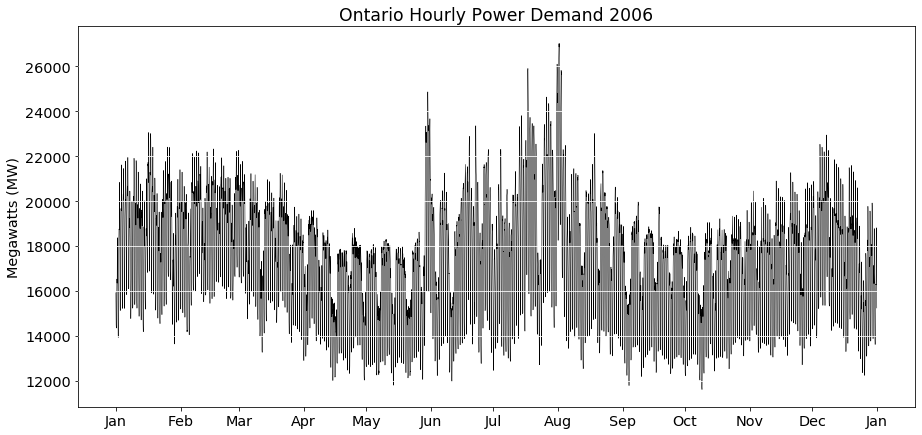

In [13]:
date_format = '%b'
mdates_locator = mdates.MonthLocator()
df = df2006['hourly_demand']
fig, ax = single_time_series_plot(df,
                                  date_format=date_format,
                                  mdates_locator=mdates_locator)
ax.set_title('Ontario Hourly Power Demand 2006')
ax.set_ylabel('Megawatts (MW)')
plt.savefig('saved-images/ontario-hourly-power-demand-2006.PNG')
plt.show();

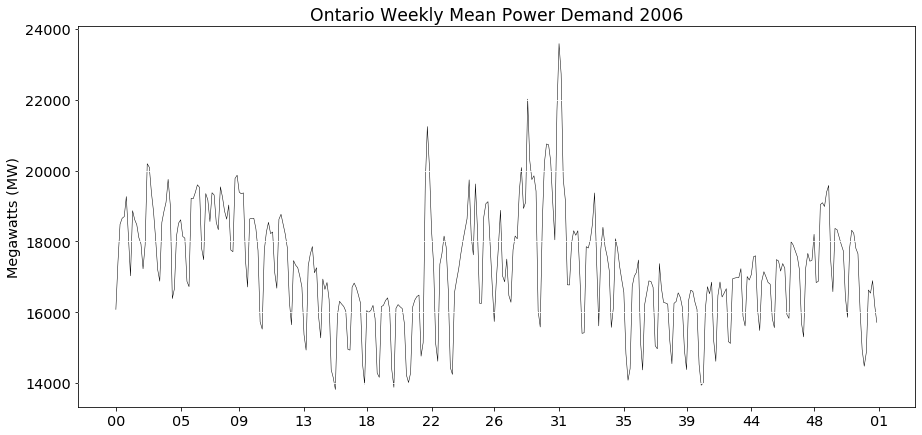

In [14]:
date_format = '%W'
mdates_locator = mdates.MonthLocator()
df = df2006['hourly_demand'].copy(deep=True)
fig, ax = single_time_series_plot(df.resample('D').mean(),
                                  date_format=date_format,
                                  mdates_locator=mdates_locator)
ax.set_title('Ontario Weekly Mean Power Demand 2006')
ax.set_ylabel('Megawatts (MW)')
plt.savefig('saved-images/ontario-weekly-mean-power-demand-2006.PNG')
plt.show();

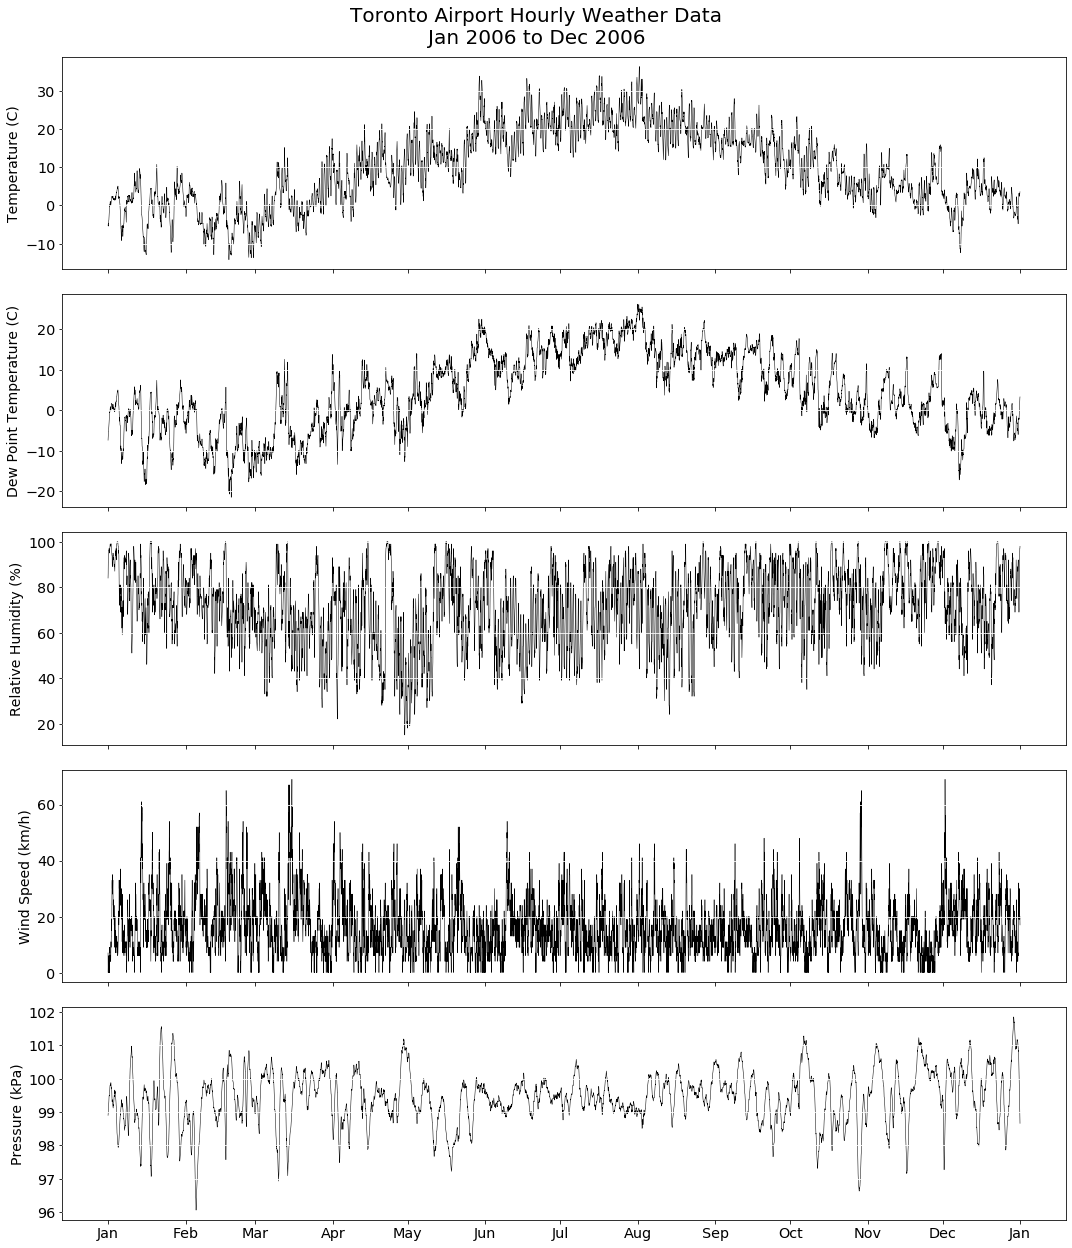

In [15]:
date_format = '%b'
mdates_locator = mdates.MonthLocator()
df = df2006[['temp', 'dew_point_temp', 'rel_hum', 'wind_speed', 'press']]
ylabels = ['Temperature (C)', 'Dew Point Temperature (C)',
           'Relative Humidity (%)', 'Wind Speed (km/h)',
          'Pressure (kPa)']
fig, axes = multi_time_series_plot(df,
                                  date_format=date_format,
                                  mdates_locator=mdates_locator, ylabels=ylabels)
plt.suptitle('Toronto Airport Hourly Weather Data\nJan 2006 to Dec 2006', fontsize=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('saved-images/toronto-airport-hourly-weather-data-2006.PNG')
plt.show();

### Impact of Hour of the Day

In [16]:
df2006_hoursindays = df2006.pivot(index='hour_of_day', columns='day_of_year', values='hourly_demand')
# create an arbitrary day to use as a datetime axis, so that we can use nice matplotlib labelling
df2006_hoursindays.index = pd.Index(df2006['2006-01-01'].index, name='hours of all days')
df2006_hoursindays.head()

day_of_year            1.0      2.0      3.0      4.0      5.0      6.0    \
hours of all days                                                           
2006-01-01 00:00:00  15925.0  14769.0  15829.0  16059.0  16017.0  16581.0   
2006-01-01 01:00:00  15323.0  14362.0  15321.0  15688.0  15548.0  16283.0   
2006-01-01 02:00:00  14832.0  14043.0  15132.0  15304.0  15294.0  15948.0   
2006-01-01 03:00:00  14502.0  13938.0  15183.0  15224.0  15225.0  15835.0   
2006-01-01 04:00:00  14392.0  14047.0  15292.0  15284.0  15367.0  15905.0   

day_of_year            7.0      8.0      9.0      10.0     11.0     12.0   \
hours of all days                                                           
2006-01-01 00:00:00  17058.0  15852.0  15730.0  16173.0  16052.0  15558.0   
2006-01-01 01:00:00  16591.0  15312.0  15484.0  15604.0  15506.0  15326.0   
2006-01-01 02:00:00  16284.0  15000.0  15237.0  15396.0  15316.0  15128.0   
2006-01-01 03:00:00  16133.0  14798.0  15264.0  15483.0  15237.0  14877.0   
2006-01-01 04:00:00  16093.0  14773.0  15481.0  15597.0  15306.0  15008.0   

day_of_year            13.0     14.0     15.0     16.0     17.0     18.0   \
hours of all days                                                           
2006-01-01 00:00:00  15460.0  14860.0  16036.0  17201.0  17482.0  16828.0   
2006-01-01 01:00:00  15127.0  14553.0  15593.0  16924.0  17159.0  16456.0   
2006-01-01 02:00:00  14903.0  14264.0  15289.0  16822.0  16914.0  16223.0   
2006-01-01 03:00:00  14714.0  14187.0  15192.0  16926.0  16882.0  15978.0   
2006-01-01 04:00:00  14897.0  14236.0  15284.0  17098.0  16975.0  15914.0   

day_of_year            19.0     20.0     21.0     22.0     23.0     24.0   \
hours of all days                                                           
2006-01-01 00:00:00  16723.0  16055.0  15561.0  15384.0  15449.0  16159.0   
2006-01-01 01:00:00  16333.0  15561.0  15300.0  14956.0  15168.0  15795.0   
2006-01-01 02:00:00  16015.0  15305.0  14947.0  14705.0  14950.0  15468.0   
2006-01-01 03:00:00  15858.0  15149.0  14803.0  14559.0  14965.0  15329.0   
2006-01-01 04:00:00  16040.0  15351.0  14794.0  14550.0  15360.0  15546.0   

day_of_year            25.0     26.0     27.0     28.0     29.0     30.0   \
hours of all days                                                           
2006-01-01 00:00:00  16031.0  17281.0  17190.0  15819.0  14586.0  15289.0   
2006-01-01 01:00:00  15700.0  16858.0  16890.0  15194.0  14112.0  14936.0   
2006-01-01 02:00:00  15499.0  16681.0  16696.0  14836.0  13802.0  14777.0   
2006-01-01 03:00:00  15402.0  16642.0  16494.0  14641.0  13671.0  14727.0   
2006-01-01 04:00:00  15553.0  16835.0  16853.0  14512.0  13644.0  14863.0   

day_of_year            31.0     32.0     33.0     34.0     35.0     36.0   \
hours of all days                                                           
2006-01-01 00:00:00  15548.0  15993.0  15913.0  15694.0  15041.0  15183.0   
2006-01-01 01:00:00  15192.0  15631.0  15461.0  15306.0  14595.0  14670.0   
2006-01-01 02:00:00  14895.0  15234.0  15153.0  15044.0  14292.0  14362.0   
2006-01-01 03:00:00  14697.0  15199.0  15031.0  14835.0  14184.0  14167.0   
2006-01-01 04:00:00  15007.0  15412.0  15170.0  14912.0  14255.0  14051.0   

day_of_year            37.0     38.0     39.0     40.0     41.0     42.0   \
hours of all days                                                           
2006-01-01 00:00:00  15937.0  16691.0  16785.0  17368.0  17327.0  16711.0   
2006-01-01 01:00:00  15642.0  16386.0  16486.0  16915.0  16903.0  16308.0   
2006-01-01 02:00:00  15408.0  16143.0  16097.0  16697.0  16764.0  16088.0   
2006-01-01 03:00:00  15362.0  16027.0  15999.0  16638.0  16768.0  15877.0   
2006-01-01 04:00:00  15751.0  16205.0  16156.0  16849.0  16932.0  15881.0   

day_of_year            43.0     44.0     45.0     46.0     47.0     48.0   \
hours of all days                                                           
2006-01-01 00:00:00  16252.0  16309.0  16646.0  16247.0  16224.0  

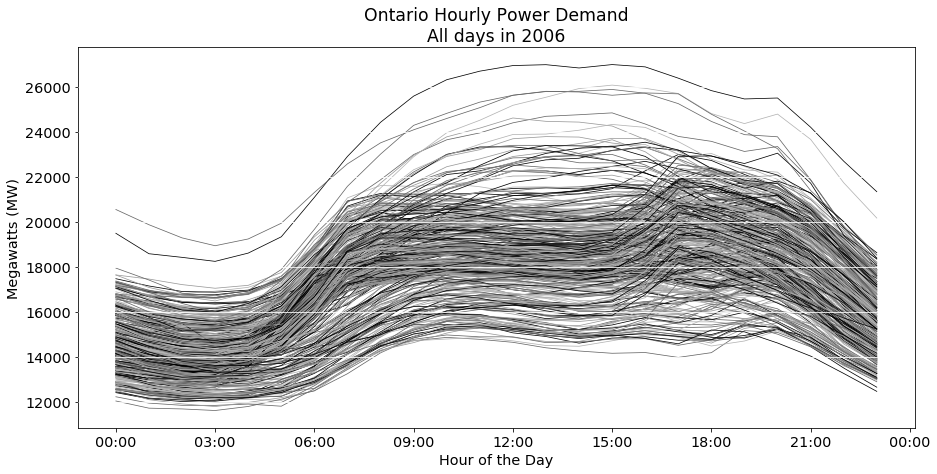

In [17]:

def seasonal_plot(df: pd.DataFrame, labels: list, date_format: str, mdates_locator):
    """
    If labels is an empty list then no labels attributed to series 
    
    """
    myFmt = DateFormatter(date_format) 
    x = df.index
    seriess = [df[col] for col in df.columns]
    fig, ax1 = plt.subplots(frameon=False, figsize=figsize)
    #ax1.set_prop_cycle('color', palettable.colorbrewer.qualitative.Set1_9.mpl_colors)
    if len(labels) == 0:
        labels = ['' for l in range(len(df.columns))]
    for series, label in zip(seriess, labels):
        ax1.plot(x, series)
    ax1.xaxis.set_major_formatter(myFmt)
    ax1.xaxis.set_major_locator(mdates_locator)

    return fig, ax1

date_format = '%H:%M'
mdates_locator = mdates.HourLocator(interval=3)
labels = []
fig, ax = seasonal_plot(df2006_hoursindays,
                        labels=labels,
                        date_format=date_format,
                        mdates_locator=mdates_locator)
ax.set_title('Ontario Hourly Power Demand\nAll days in 2006')
ax.set_ylabel('Megawatts (MW)')
ax.set_xlabel('Hour of the Day')
plt.savefig('saved-images/ontario-hourly-power-demand-all-days-2006.PNG')
plt.show();

### Hourly Demand as a Percentage of Daily Maximum Demand

In [18]:
df2006_hoursindays_pct = df2006_hoursindays / df2006_hoursindays.max(axis=0)
df2006_hoursindays_pct.head()

day_of_year             1.0       2.0       3.0       4.0       5.0    \
hours of all days                                                       
2006-01-01 00:00:00  0.866855  0.708719  0.732485  0.748602  0.735298   
2006-01-01 01:00:00  0.834086  0.689189  0.708977  0.731307  0.713768   
2006-01-01 02:00:00  0.807359  0.673881  0.700231  0.713407  0.702107   
2006-01-01 03:00:00  0.789396  0.668842  0.702591  0.709677  0.698940   
2006-01-01 04:00:00  0.783409  0.674073  0.707635  0.712474  0.705458   

day_of_year             6.0       7.0       8.0       9.0       10.0   \
hours of all days                                                       
2006-01-01 00:00:00  0.755708  0.834173  0.792996  0.718101  0.741813   
2006-01-01 01:00:00  0.742127  0.811336  0.765983  0.706871  0.715714   
2006-01-01 02:00:00  0.726858  0.796323  0.750375  0.695595  0.706174   
2006-01-01 03:00:00  0.721708  0.788938  0.740270  0.696827  0.710164   
2006-01-01 04:00:00  0.724899  0.786982  0.739020  0.706734  0.715393   

day_of_year             11.0      12.0      13.0      14.0      15.0   \
hours of all days                                                       
2006-01-01 00:00:00  0.753827  0.749278  0.756027  0.742517  0.763837   
2006-01-01 01:00:00  0.728186  0.738104  0.739743  0.727177  0.742736   
2006-01-01 02:00:00  0.719264  0.728569  0.728789  0.712737  0.728256   
2006-01-01 03:00:00  0.715554  0.716480  0.719546  0.708889  0.723635   
2006-01-01 04:00:00  0.718794  0.722789  0.728495  0.711338  0.728018   

day_of_year             16.0      17.0      18.0      19.0      20.0   \
hours of all days                                                       
2006-01-01 00:00:00  0.746183  0.759889  0.751284  0.795273  0.789370   
2006-01-01 01:00:00  0.734166  0.745849  0.734676  0.776726  0.765082   
2006-01-01 02:00:00  0.729741  0.735200  0.724273  0.761604  0.752495   
2006-01-01 03:00:00  0.734253  0.733809  0.713335  0.754137  0.744825   
2006-01-01 04:00:00  0.741714  0.737851  0.710478  0.762792  0.754757   

day_of_year             21.0      22.0      23.0      24.0      25.0   \
hours of all days                                                       
2006-01-01 00:00:00  0.797305  0.788438  0.723065  0.742431  0.715542   
2006-01-01 01:00:00  0.783932  0.766503  0.709913  0.725706  0.700768   
2006-01-01 02:00:00  0.765845  0.753639  0.699710  0.710682  0.691796   
2006-01-01 03:00:00  0.758467  0.746156  0.700412  0.704296  0.687467   
2006-01-01 04:00:00  0.758006  0.745695  0.718899  0.714266  0.694206   

day_of_year             26.0      27.0      28.0      29.0      30.0   \
hours of all days                                                       
2006-01-01 00:00:00  0.771818  0.822724  0.851812  0.749153  0.729054   
2006-01-01 01:00:00  0.752925  0.808366  0.818157  0.724807  0.712222   
2006-01-01 02:00:00  0.745020  0.799081  0.798880  0.708885  0.704640   
2006-01-01 03:00:00  0.743278  0.789413  0.788380  0.702157  0.702255   
2006-01-01 04:00:00  0.751898  0.806595  0.781433  0.700770  0.708741   

day_of_year             31.0      32.0      33.0      34.0      35.0   \
hours of all days                                                       
2006-01-01 00:00:00  0.726610  0.751198  0.770307  0.772951  0.772284   
2006-01-01 01:00:00  0.709973  0.734194  0.748427  0.753842  0.749384   
2006-01-01 02:00:00  0.696093  0.715547  0.733517  0.740938  0.733826   
2006-01-01 03:00:00  0.686840  0.713903  0.727612  0.730644  0.728281   
2006-01-01 04:00:00  0.701327  0.723908  0.734340  0.734437  0.731926   

day_of_year             36.0      37.0      38.0      39.0      40.0   \
hours of all days                                                       
2006-01-01 00:00:00  0.772475  0.720512  0.760271  0.755061  0.784215   
2006-01-01 01:00:00  0.746375  0.707175  0.746379  0.741610  0.763760   
2006-01-01 02:00:00  0.730705  0.696596  0.735310  0.724112  0.753917   
2006-01-01 03:00:00  0.720784  0.694516  0.730026  

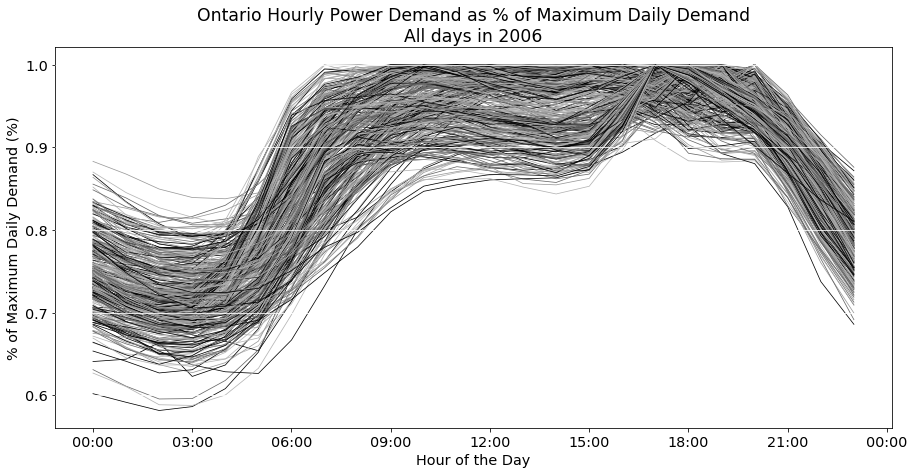

In [19]:
date_format = '%H:%M'
mdates_locator = mdates.HourLocator(interval=3)
labels = []
fig, ax = seasonal_plot(df2006_hoursindays_pct,
                        labels=labels,
                        date_format=date_format,
                        mdates_locator=mdates_locator)
ax.set_title('Ontario Hourly Power Demand as % of Maximum Daily Demand\nAll days in 2006')
ax.set_ylabel('% of Maximum Daily Demand (%)')
ax.set_xlabel('Hour of the Day')
plt.savefig('saved-images/ontario-hourly-power-demand-all-days-as-pct-max-daily.PNG')
plt.show();

## Day of Week

Stacking the data is a bit more complicated than other timescales because weeks run across years

In [20]:
df2006_daysinweeks_start = df2006[['year', 'week_of_year', 'day_of_week', 'daily_peak']].copy(deep=True)
df2006_daysinweeks_start.drop_duplicates(inplace=True)
df2006_daysinweeks_start.head(10)

year  week_of_year  day_of_week  daily_peak
2006-01-01  2006.0          52.0          6.0     18371.0
2006-01-02  2006.0           1.0          0.0     20839.0
2006-01-03  2006.0           1.0          1.0     21610.0
2006-01-04  2006.0           1.0          2.0     21452.0
2006-01-05  2006.0           1.0          3.0     21783.0
2006-01-06  2006.0           1.0          4.0     21941.0
2006-01-07  2006.0           1.0          5.0     20449.0
2006-01-08  2006.0           1.0          6.0     19990.0
2006-01-09  2006.0           2.0          0.0     21905.0
2006-01-10  2006.0           2.0          1.0     21802.0

In [21]:
df2006_daysinweeks_start.tail()

year  week_of_year  day_of_week  daily_peak
2006-12-27  2006.0          52.0          2.0     19768.0
2006-12-28  2006.0          52.0          3.0     19560.0
2006-12-29  2006.0          52.0          4.0     19917.0
2006-12-30  2006.0          52.0          5.0     18780.0
2006-12-31  2006.0          52.0          6.0     18813.0

In [22]:
df2006_daysinweeks_subset = df2006_daysinweeks_start.iloc[3:]
df2006_daysinweeks_subset.head(8)

year  week_of_year  day_of_week  daily_peak
2006-01-04  2006.0           1.0          2.0     21452.0
2006-01-05  2006.0           1.0          3.0     21783.0
2006-01-06  2006.0           1.0          4.0     21941.0
2006-01-07  2006.0           1.0          5.0     20449.0
2006-01-08  2006.0           1.0          6.0     19990.0
2006-01-09  2006.0           2.0          0.0     21905.0
2006-01-10  2006.0           2.0          1.0     21802.0
2006-01-11  2006.0           2.0          2.0     21294.0

In [23]:
df2006_daysinweeks = df2006_daysinweeks_subset.pivot(index='day_of_week',
                                                     columns='week_of_year',
                                                     values='daily_peak')
# create an arbitrary day to use as a datetime axis, so that we can use nice matplotlib labelling
df2006_daysinweeks.index = pd.Index(df2006_daysinweeks_subset.loc['2006-01-04': '2006-01-10'].index,
                                    name='representative days of all weeks')
df2006_daysinweeks.head(8)
## ! Note index is a sample week from 2006 - Used so that the plots x axis can be formatted automatically

week_of_year                         1.0      2.0      3.0      4.0      5.0   \
representative days of all weeks                                                
2006-01-04                            NaN  21905.0  23052.0  21366.0  20971.0   
2006-01-05                            NaN  21802.0  23006.0  21765.0  21398.0   
2006-01-06                        21452.0  21294.0  22399.0  22404.0  21290.0   
2006-01-07                        21783.0  20764.0  21028.0  22390.0  20658.0   
2006-01-08                        21941.0  20449.0  20339.0  20894.0  20304.0   
2006-01-09                        20449.0  20013.0  19517.0  18571.0  19476.0   
2006-01-10                        19990.0  20994.0  19512.0  19470.0  19655.0   

week_of_year                         6.0      7.0      8.0      9.0      10.0  \
representative days of all weeks                                                
2006-01-04                        22119.0  22187.0  21928.0  22215.0  21224.0   
2006-01-05                        21954.0  21511.0  21572.0  22264.0  20887.0   
2006-01-06                        22230.0  21107.0  21017.0  21636.0  21173.0   
2006-01-07                        22147.0  22321.0  21062.0  21772.0  20613.0   
2006-01-08                        21546.0  21714.0  21013.0  21188.0  19601.0   
2006-01-09                        19697.0  20709.0  19829.0  18976.0  17328.0   
2006-01-10                        20126.0  20647.0  20344.0  19114.0  17794.0   

week_of_year                         11.0     12.0     13.0     14.0     15.0  \
representative days of all weeks                                                
2006-01-04                        19990.0  21238.0  19737.0  19334.0  18600.0   
2006-01-05                        20958.0  21164.0  19321.0  19580.0  18248.0   
2006-01-06                        20871.0  20819.0  19424.0  19582.0  18717.0   
2006-01-07                        20370.0  20485.0  19212.0  18826.0  18111.0   
2006-01-08                        20137.0  19407.0  18499.0  19256.0  15729.0   
2006-01-09                        19134.0  18050.0  17104.0  17377.0  15474.0   
2006-01-10                        19126.0  18059.0  17181.0  17139.0  15173.0   

week_of_year                         16.0     17.0     18.0     19.0     20.0  \
representative days of all weeks                                                
2006-01-04                        17660.0  18573.0  17790.0  17974.0  17870.0   
2006-01-05                        17869.0  18796.0  17658.0  18225.0  17947.0   
2006-01-06                        17708.0  18200.0  17855.0  18303.0  17904.0   
2006-01-07                        17812.0  18037.0  18063.0  18124.0  17986.0   
2006-01-08                        17792.0  18043.0  17934.0  18015.0  17489.0   
2006-01-09                        16689.0  15915.0  15854.0  15919.0  15643.0   
2006-01-10                        16879.0  15946.0  15981.0  15708.0  15319.0   

week_of_year                         21.0     22.0     23.0     24.0     25.0  \
representative days of all weeks                                                
2006-01-04                        16071.0  23338.0  20036.0  18654.0  22885.0   
2006-01-05                        17794.0  24857.0  20465.0  19100.0  20579.0   
2006-01-06                        18149.0  23662.0  21249.0  19420.0  19772.0   
2006-01-07                        18328.0  20320.0  20402.0  20131.0  23349.0   
2006-01-08                        18624.0  19726.0  19008.0  20799.0  20844.0   
2006-01-09                        16179.0  16864.0  15937.0  21635.0  18587.0   
2006-01-10                        17580.0  16609.0  15940.0  21532.0  19004.0   

week_of_year                         26.0     27.0     28.0     29.0     30.0  \
representative days of all weeks                                                
2006-01-04                        21628.0  20745.0  20276.0  25898.0  21653.0   
2006-01-05                        21720.0  22299.0  21321.0  23724.0  23413.0   
2006-01-06                

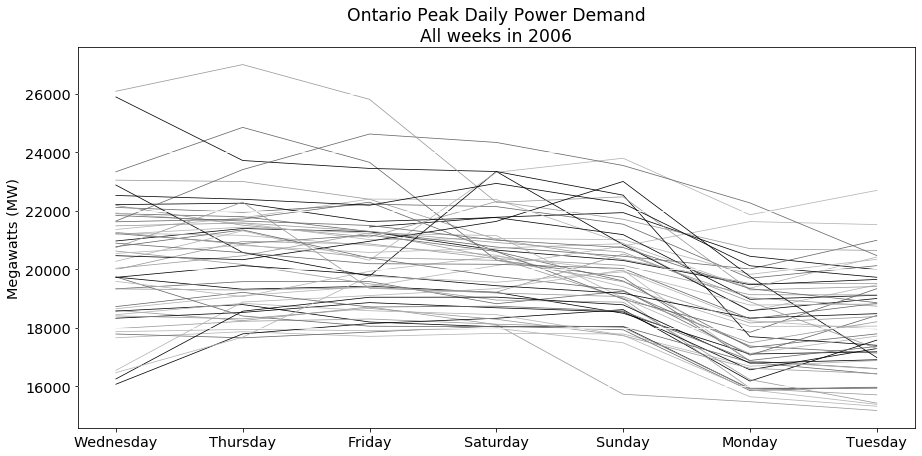

In [24]:
date_format = '%A'
mdates_locator = mdates.DayLocator()
labels = []
fig, ax = seasonal_plot(df2006_daysinweeks,
                        labels=labels,
                        date_format=date_format,
                        mdates_locator=mdates_locator)
ax.set_title('Ontario Peak Daily Power Demand\nAll weeks in 2006')
ax.set_ylabel('Megawatts (MW)')
#ax.set_xlabel('Day of week')
plt.savefig('saved-images/ontario-peak-daily-power-demand-all-weeks-2006.PNG')
plt.show();

In [25]:
df2006_daysinweeks_pct = df2006_daysinweeks / df2006_daysinweeks.max(axis=0)
df2006_daysinweeks_pct.head(10)

week_of_year                          1.0       2.0       3.0       4.0   \
representative days of all weeks                                           
2006-01-04                             NaN  1.000000  1.000000  0.953669   
2006-01-05                             NaN  0.995298  0.998005  0.971478   
2006-01-06                        0.977713  0.972107  0.971673  1.000000   
2006-01-07                        0.992799  0.947911  0.912199  0.999375   
2006-01-08                        1.000000  0.933531  0.882310  0.932601   
2006-01-09                        0.931999  0.913627  0.846651  0.828914   
2006-01-10                        0.911080  0.958411  0.846434  0.869041   

week_of_year                          5.0       6.0       7.0       8.0   \
representative days of all weeks                                           
2006-01-04                        0.980045  0.995007  0.993997  1.000000   
2006-01-05                        1.000000  0.987584  0.963711  0.983765   
2006-01-06                        0.994953  1.000000  0.945612  0.958455   
2006-01-07                        0.965417  0.996266  1.000000  0.960507   
2006-01-08                        0.948874  0.969231  0.972806  0.958273   
2006-01-09                        0.910179  0.886055  0.927781  0.904278   
2006-01-10                        0.918544  0.905353  0.925003  0.927764   

week_of_year                          9.0       10.0      11.0      12.0  \
representative days of all weeks                                           
2006-01-04                        0.997799  1.000000  0.953812  1.000000   
2006-01-05                        1.000000  0.984122  1.000000  0.996516   
2006-01-06                        0.971793  0.997597  0.995849  0.980271   
2006-01-07                        0.977902  0.971212  0.971944  0.964545   
2006-01-08                        0.951671  0.923530  0.960826  0.913787   
2006-01-09                        0.852318  0.816434  0.912969  0.849892   
2006-01-10                        0.858516  0.838391  0.912587  0.850315   

week_of_year                          13.0      14.0      15.0      16.0  \
representative days of all weeks                                           
2006-01-04                        1.000000  0.987335  0.993749  0.988304   
2006-01-05                        0.978923  0.999898  0.974943  1.000000   
2006-01-06                        0.984141  1.000000  1.000000  0.990990   
2006-01-07                        0.973400  0.961393  0.967623  0.996810   
2006-01-08                        0.937275  0.983352  0.840359  0.995691   
2006-01-09                        0.866596  0.887397  0.826735  0.933964   
2006-01-10                        0.870497  0.875243  0.810653  0.944597   

week_of_year                          17.0      18.0      19.0      20.0  \
representative days of all weeks                                           
2006-01-04                        0.988136  0.984886  0.982025  0.993551   
2006-01-05                        1.000000  0.977578  0.995738  0.997832   
2006-01-06                        0.968291  0.988485  1.000000  0.995441   
2006-01-07                        0.959619  1.000000  0.990220  1.000000   
2006-01-08                        0.959938  0.992858  0.984265  0.972367   
2006-01-09                        0.846723  0.877706  0.869748  0.869732   
2006-01-10                        0.848372  0.884737  0.858220  0.851718   

week_of_year                          21.0      22.0      23.0      24.0  \
representative days of all weeks                                           
2006-01-04                        0.862919  0.938890  0.942915  0.862214   
2006-01-05                        0.955434  1.000000  0.963104  0.882829   
2006-01-06                        0.974495  0.951925  1.000000  0.897620   
2006-01-07                        0.984107  0.817476  0.960139  0.930483   
2006-01-08                        1.000000  0.793579  0.894536  0.961359   
2006-01-09                        0.868718 

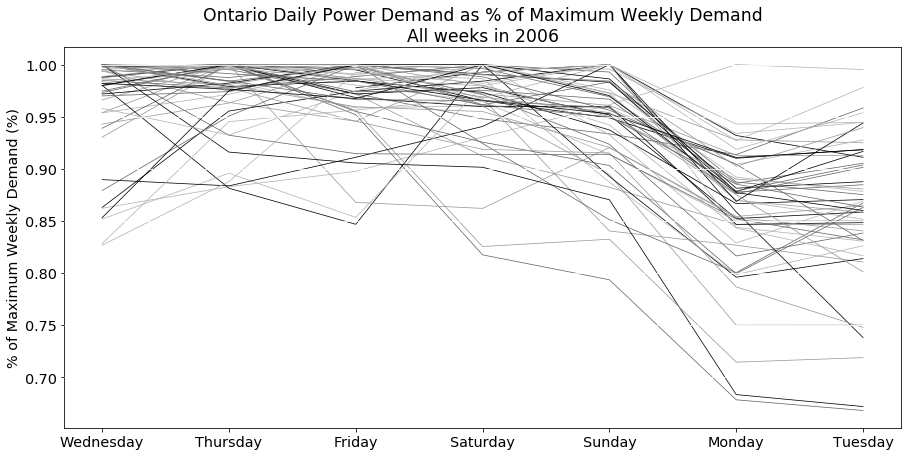

In [26]:
date_format = '%A'
mdates_locator = mdates.DayLocator()
labels = []
fig, ax = seasonal_plot(df2006_daysinweeks_pct,
                        labels=labels,
                        date_format=date_format,
                        mdates_locator=mdates_locator)
ax.set_title('Ontario Daily Power Demand as % of Maximum Weekly Demand\nAll weeks in 2006')
ax.set_ylabel('% of Maximum Weekly Demand (%)')
plt.savefig('saved-images/ontario-peak-daily-power-demand-as-pct-max-weekly-demand-all-weeks-2006.PNG')
plt.show();

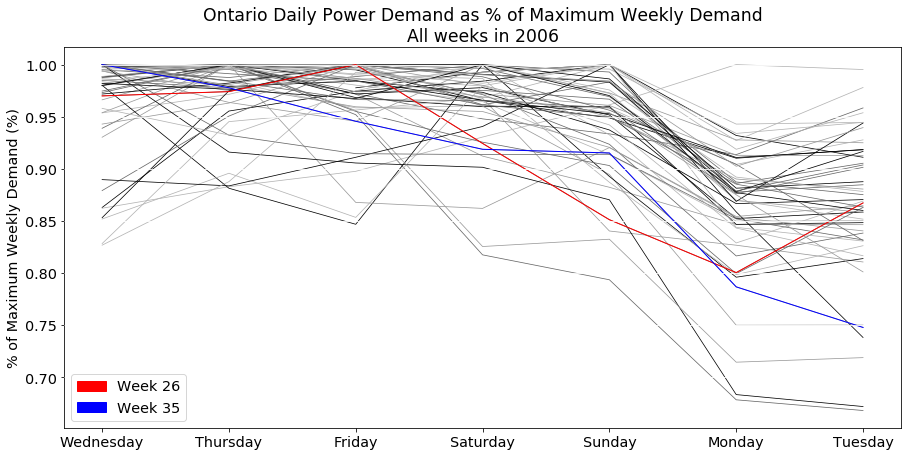

In [27]:
import matplotlib.patches as mpatches
date_format = '%A'
mdates_locator = mdates.DayLocator()
labels = []
fig, ax = seasonal_plot(df2006_daysinweeks_pct,
                        labels=labels,
                        date_format=date_format,
                        mdates_locator=mdates_locator)
ax.set_title('Ontario Daily Power Demand as % of Maximum Weekly Demand\nAll weeks in 2006')
ax.set_ylabel('% of Maximum Weekly Demand (%)')

line26 = ax.plot(df2006_daysinweeks_pct[26.0], c='r', label='week 26', linewidth=1.0)
line35 = ax.plot(df2006_daysinweeks_pct[35.0], c='b', label='week 35', linewidth=1)
red_patch = mpatches.Patch(color='red', label='Week 26')
blue_patch = mpatches.Patch(color='blue', label='Week 35')
plt.legend(handles=[red_patch, blue_patch])
plt.savefig('saved-images/ontario-peak-daily-power-demand-as-pct-max-weekly-demand-all-weeks-2006-highlighted.PNG')
plt.show();

### Days of Week and hour of day

Heatmap

In [28]:
df = df2006[['hour_of_day', 'day_of_week', 'hourly_demand']].copy(deep=True)
df.head()

hour_of_day  day_of_week  hourly_demand
2006-01-01 00:00:00          0.0          6.0        15925.0
2006-01-01 01:00:00          1.0          6.0        15323.0
2006-01-01 02:00:00          2.0          6.0        14832.0
2006-01-01 03:00:00          3.0          6.0        14502.0
2006-01-01 04:00:00          4.0          6.0        14392.0

In [29]:
df_pivot = df.pivot_table(index='hour_of_day',
                         columns = 'day_of_week',
                         values='hourly_demand',
                         aggfunc='mean')

# Set up the indices with some arbitrary dates so we can use matplotlib auto labeling functionality
# df_pivot.index = pd.Index(df2006.loc['2006-01-04': '2006-01-10'].index,
#                                     name='representative days of all weeks')
# df_pivot.index = pd.Index(df2006.loc['2006-01-04': '2006-01-10'].index,
#                                     name='representative days of all weeks')
df_pivot.index = pd.Index(df2006['2006-01-01'].index, name='hours of all days')
df_pivot.sort_index(ascending=False, inplace=True)
df_pivot.rename(columns = {0:'Monday', 1: 'Tuesday', 2: 'Wednesday',
                          3: 'Thursday', 4: 'Friday',
                          5: 'Saturday', 6: 'Sunday'}, inplace=True)
df_pivot.head(25)

day_of_week                Monday       Tuesday     Wednesday      Thursday  \
hours of all days                                                             
2006-01-01 23:00:00  15794.942308  15835.788462  15729.288462  15724.942308   
2006-01-01 22:00:00  16995.153846  17052.711538  16957.480769  16950.961538   
2006-01-01 21:00:00  18318.153846  18441.307692  18296.384615  18260.250000   
2006-01-01 20:00:00  19342.480769  19457.942308  19294.788462  19261.000000   
2006-01-01 19:00:00  19682.480769  19815.057692  19683.673077  19611.576923   
2006-01-01 18:00:00  19798.807692  19979.692308  19850.192308  19680.461538   
2006-01-01 17:00:00  19863.076923  20061.346154  19948.673077  19709.769231   
2006-01-01 16:00:00  19661.807692  19883.365385  19751.942308  19519.769231   
2006-01-01 15:00:00  19361.884615  19628.653846  19526.653846  19298.942308   
2006-01-01 14:00:00  19231.538462  19471.538462  19374.423077  19204.692308   
2006-01-01 13:00:00  19300.076923  19521.538462  19412.846154  19261.903846   
2006-01-01 12:00:00  19362.192308  19535.865385  19450.846154  19332.826923   
2006-01-01 11:00:00  19387.153846  19530.673077  19450.884615  19337.923077   
2006-01-01 10:00:00  19303.826923  19524.961538  19418.596154  19310.519231   
2006-01-01 09:00:00  19054.192308  19350.326923  19236.230769  19145.980769   
2006-01-01 08:00:00  18664.653846  19059.673077  18959.923077  18879.384615   
2006-01-01 07:00:00  18023.961538  18553.826923  18447.288462  18386.961538   
2006-01-01 06:00:00  16635.115385  17214.173077  17155.076923  17080.826923   
2006-01-01 05:00:00  15191.500000  15659.442308  15627.269231  15566.346154   
2006-01-01 04:00:00  14388.192308  14791.788462  14756.596154  14694.538462   
2006-01-01 03:00:00  14017.461538  14438.519231  14416.788462  14347.711538   
2006-01-01 02:00:00  13990.769231  14453.846154  14445.846154  14394.961538   
2006-01-01 01:00:00  14174.038462  14705.865385  14722.442308  14636.442308   
2006-01-01 00:00:00  14459.288462  15035.826923  15086.826923  14986.480769   

day_of_week                Friday      Saturday        Sunday  
hours of all days                                              
2006-01-01 23:00:00  15390.788462  14794.173077  15038.377358  
2006-01-01 22:00:00  16528.269231  15702.019231  15924.150943  
2006-01-01 21:00:00  17737.692308  16559.000000  16903.811321  
2006-01-01 20:00:00  18591.442308  17180.480769  17575.226415  
2006-01-01 19:00:00  18975.538462  17427.115385  17744.113208  
2006-01-01 18:00:00  19178.865385  17598.365385  17723.566038  
2006-01-01 17:00:00  19318.057692  17629.961538  17666.603774  
2006-01-01 16:00:00  19158.000000  17330.230769  17278.943396  
2006-01-01 15:00:00  19015.750000  17043.942308  16899.245283  
2006-01-01 14:00:00  19035.903846  17011.596154  16728.943396  
2006-01-01 13:00:00  19171.711538  17172.576923  16789.452830  
2006-01-01 12:00:00  19279.826923  17381.500000  16902.943396  
2006-01-01 11:00:00  19352.865385  17517.211538  16893.226415  
2006-01-01 10:00:00  19340.750000  17490.384615  16700.886792  
2006-01-01 09:00:00  19149.865385  17207.615385  16272.830189  
2006-01-01 08:00:00  18847.788462  16606.173077  15590.094340  
2006-01-01 07:00:00  18280.557692  15694.615385  14724.207547  
2006-01-01 06:00:00  16975.384615  14715.019231  13953.471698  
2006-01-01 05:00:00  15547.384615  14063.942308  13486.075472  
2006-01-01 04:00:00  14686.807692  13802.634615  13356.679245  
2006-01-01 03:00:00  14327.769231  13752.557692  13351.132075  
2006-01-01 02:00:00  14356.923077  13861.134615  13489.132075  
2006-01-01 01:00:00  14614.057692  14167.653846  13750.849057  
2006-01-01 00:00:00  14982.500000  14568.153846  14144.566038

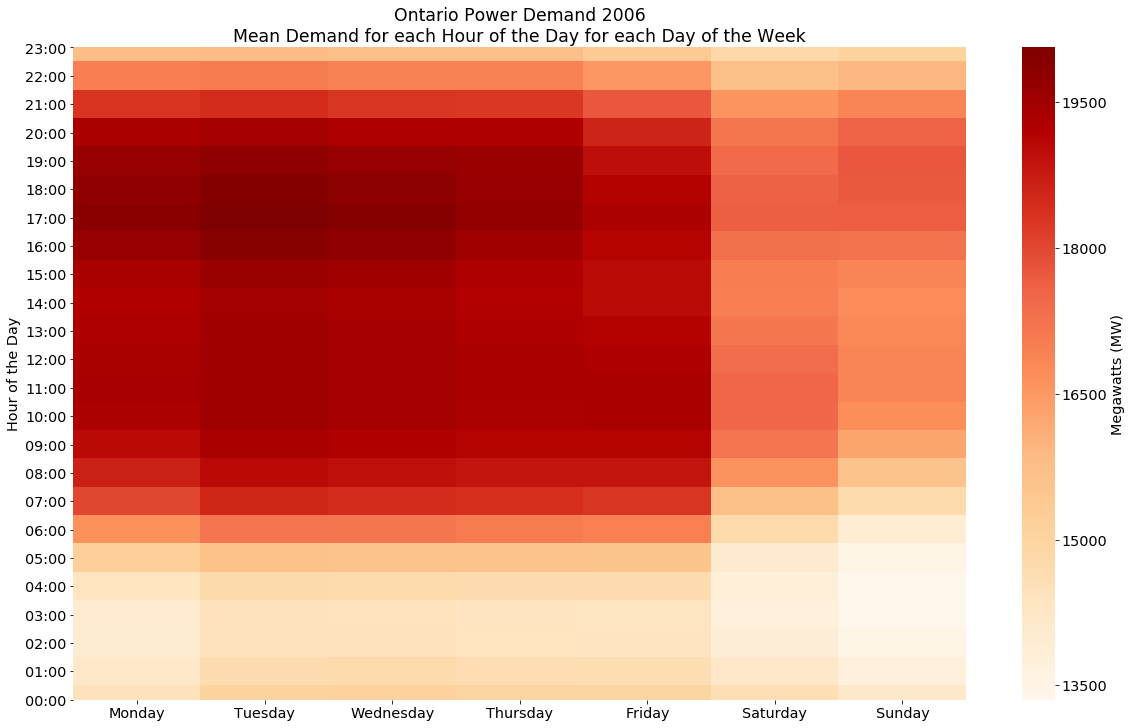

In [30]:
fig, ax1 = plt.subplots(frameon=False, figsize=(20,12))

ax1 = sns.heatmap(ax=ax1,
                  data = df_pivot,
                  cmap=palettable.colorbrewer.sequential.OrRd_9.mpl_colormap, # OrRd_9
                 cbar_kws={'label': 'Megawatts (MW)'}
                 )

ax1.set_yticklabels([i.strftime("%H:%M") for i in df_pivot.index], rotation=0)
ax1.set_ylabel('Hour of the Day')
ax1.set_xlabel('')
ax1.set_title('Ontario Power Demand 2006\nMean Demand for each Hour of the Day for each Day of the Week')
plt.savefig('saved-images/ontario-mean-power-demand-2006-hourofday-by-dayofweek-heatmap.PNG')
plt.show();

### Weekdays, Statutory Holidays, Weekends

In [31]:
df2006.head()

temp  dew_point_temp  rel_hum  wind_speed  visibility  \
2006-01-01 00:00:00  -5.2            -7.4     84.0         7.0        19.3   
2006-01-01 01:00:00  -5.0            -7.0     86.0         0.0        19.3   
2006-01-01 02:00:00  -5.4            -6.3     93.0         4.0         4.0   
2006-01-01 03:00:00  -5.0            -5.6     96.0         4.0         2.0   
2006-01-01 04:00:00  -4.6            -5.2     96.0         0.0         2.0   

                     press  hmdx  wind_chill weather  hour_of_day    year  \
2006-01-01 00:00:00  98.90   NaN        -8.0  Cloudy          0.0  2006.0   
2006-01-01 01:00:00  98.96   NaN         NaN  Cloudy          1.0  2006.0   
2006-01-01 02:00:00  99.01   NaN        -7.0     Fog          2.0  2006.0   
2006-01-01 03:00:00  99.05   NaN        -7.0     Fog          3.0  2006.0   
2006-01-01 04:00:00  99.08   NaN         NaN     Fog          4.0  2006.0   

                     month  day_of_week  day_of_year  week_of_year  quarter  \
2006-01-01 00:00:00    1.0          6.0          1.0          52.0      1.0   
2006-01-01 01:00:00    1.0          6.0          1.0          52.0      1.0   
2006-01-01 02:00:00    1.0          6.0          1.0          52.0      1.0   
2006-01-01 03:00:00    1.0          6.0          1.0          52.0      1.0   
2006-01-01 04:00:00    1.0          6.0          1.0          52.0      1.0   

                    stat_hol day_light_hours  hourly_demand  daily_peak  \
2006-01-01 00:00:00     True           False        15925.0     18371.0   
2006-01-01 01:00:00     True           False        15323.0     18371.0   
2006-01-01 02:00:00     True           False        14832.0     18371.0   
2006-01-01 03:00:00     True           False        14502.0     18371.0   
2006-01-01 04:00:00     True           False        14392.0     18371.0   

                    dayofweek  daytype  
2006-01-01 00:00:00       Sun  Weekend  
2006-01-01 01:00:00       Sun  Weekend  
2006-01-01 02:00:00       Sun  Weekend  
2006-01-01 03:00:00       Sun  Weekend  
2006-01-01 04:00:00       Sun  Weekend

In [32]:
holiday_demand = df2006[df2006['stat_hol'] == 'True']
remainder = df2006[df2006['stat_hol'] != 'True']
weekend_demand = remainder[remainder['day_of_week'].isin([5.0,6.0])]

crit1 = df2006['stat_hol'] == 'False'
crit2 = df2006['day_of_week'].isin([0.0, 1.0, 2.0, 3.0, 4.0])
others = df2006[crit1 & crit2]

hd = holiday_demand['hourly_demand'].reset_index(drop=True).rename('Stat Holidays')
wed = weekend_demand['hourly_demand'].reset_index(drop=True).rename('Weekends')
wdd = others['hourly_demand'].reset_index(drop=True).rename('Business Days')

daytype_df = pd.concat([hd, wed, wdd], axis=1)
daytype_df.head()

Stat Holidays  Weekends  Business Days
0        15925.0   17058.0        15829.0
1        15323.0   16591.0        15321.0
2        14832.0   16284.0        15132.0
3        14502.0   16133.0        15183.0
4        14392.0   16093.0        15292.0

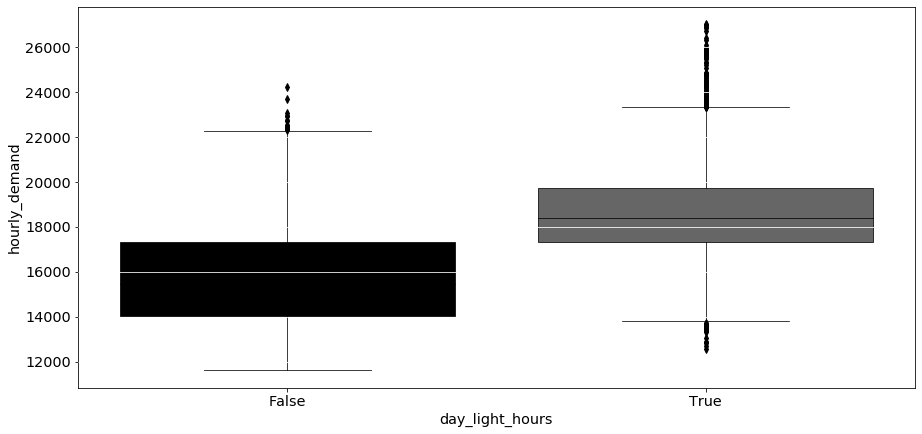

In [33]:
fig, ax = plt.subplots(frameon=False, figsize=figsize)
sns.boxplot(x= df2006['day_light_hours'], y = df2006['hourly_demand'], ax=ax)
plt.savefig('saved-images/11.PNG')
plt.show();

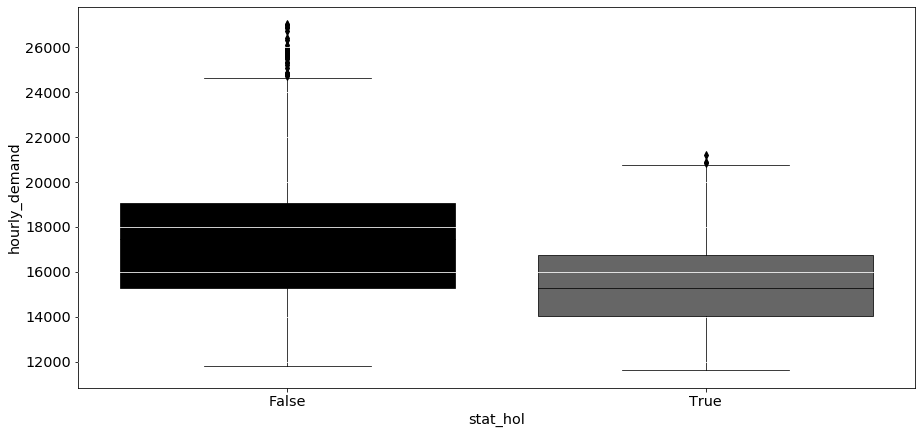

In [34]:
fig, ax = plt.subplots(frameon=False, figsize=figsize)
sns.boxplot(x= df2006['stat_hol'], y = df2006['hourly_demand'], ax=ax)
plt.savefig('saved-images/12.PNG')
plt.show();

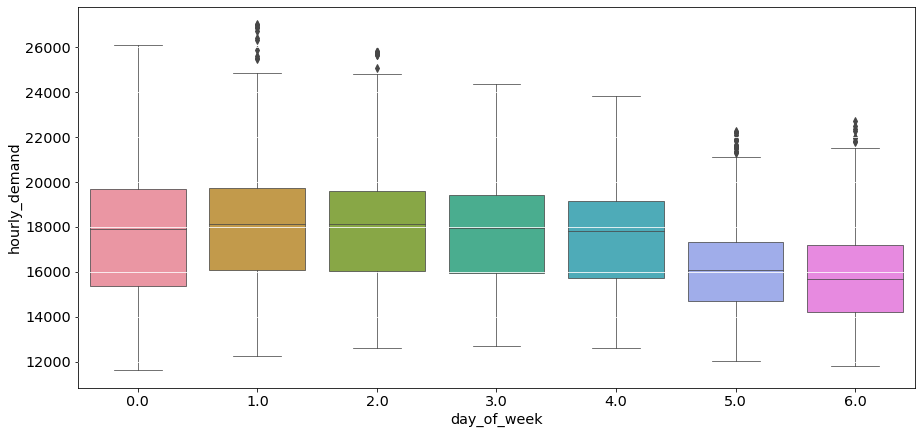

In [35]:
fig, ax = plt.subplots(frameon=False, figsize=figsize)
sns.boxplot(x= df2006['day_of_week'], y = df2006['hourly_demand'], ax=ax)
plt.savefig('saved-images/13.PNG')
plt.show();

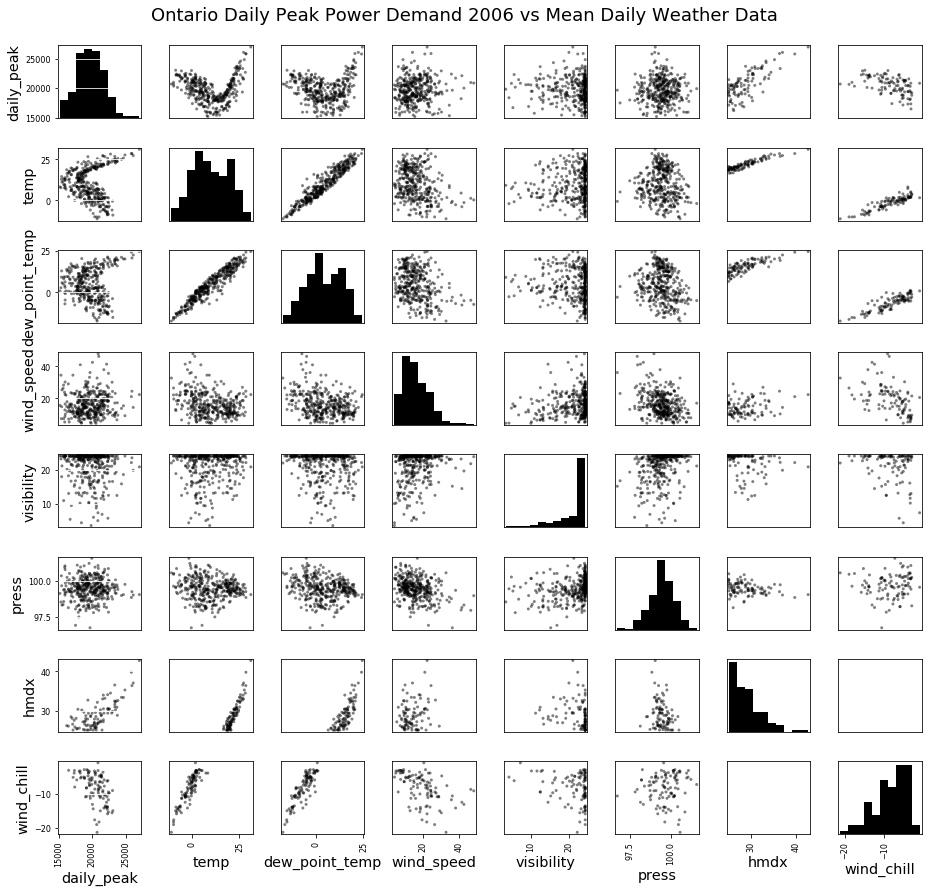

In [36]:
df = df2006[['daily_peak', 'temp', 'dew_point_temp',
             'wind_speed', 'visibility', 'press', 'hmdx', 'wind_chill']].resample('D').mean()
df = df.loc[:, ['daily_peak', 'temp', 'dew_point_temp',
                'wind_speed', 'visibility', 'press', 'hmdx', 'wind_chill']]
pd.plotting.scatter_matrix(df, figsize=(13,13));
#ax1.set_ylabel('Hour of the Day')
#ax1.set_xlabel('')
plt.suptitle('Ontario Daily Peak Power Demand 2006 vs Mean Daily Weather Data', fontsize=18)
plt.savefig('saved-images/ontario-daily-peak-power-demand-2006-vs-mean-daily-weather-data.PNG')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show();

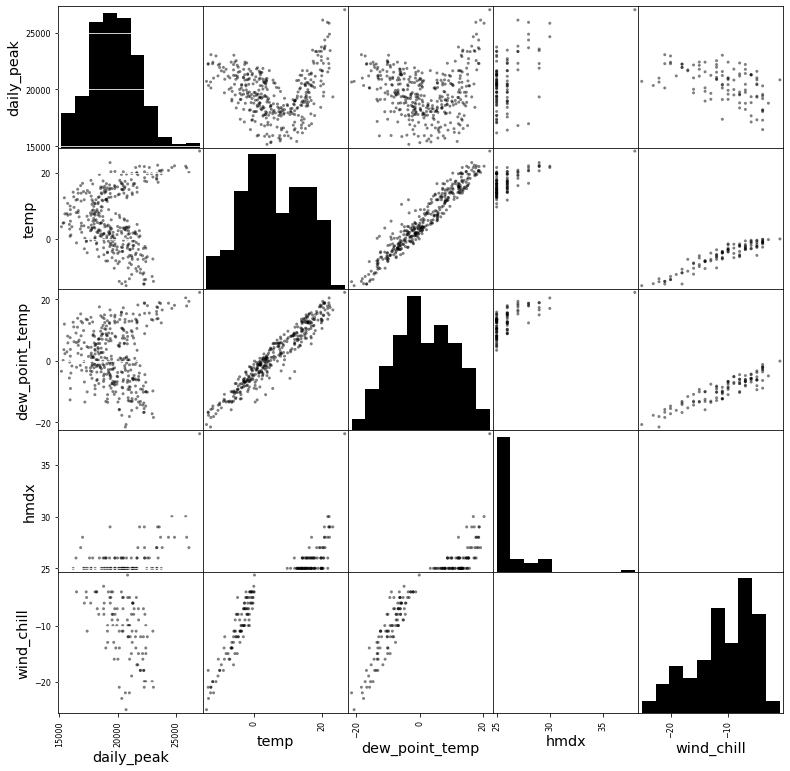

In [37]:
df = df2006[['daily_peak', 'temp', 'dew_point_temp', 'hmdx', 'wind_chill']].resample('D').min()
df = df.loc[:, ['daily_peak', 'temp', 'dew_point_temp', 'hmdx', 'wind_chill']]
pd.plotting.scatter_matrix(df, figsize=(13,13));
plt.savefig('saved-images/15.PNG')

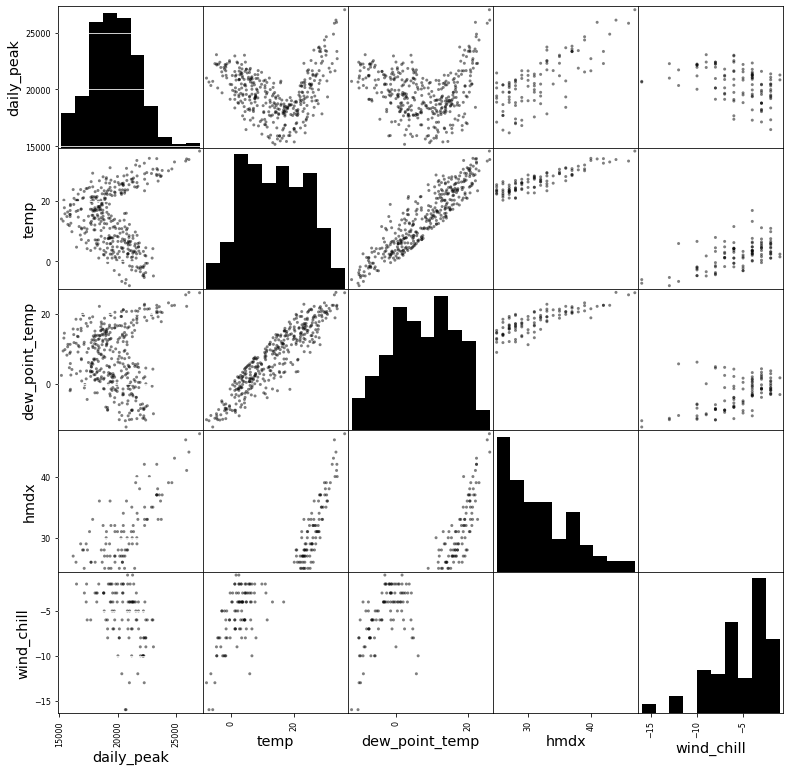

In [38]:
df = df2006[['daily_peak', 'temp', 'dew_point_temp', 'hmdx', 'wind_chill']].resample('D').max()
df = df.loc[:, ['daily_peak', 'temp', 'dew_point_temp', 'hmdx', 'wind_chill']]
pd.plotting.scatter_matrix(df, figsize=(13,13));
plt.savefig('saved-images/16.PNG')

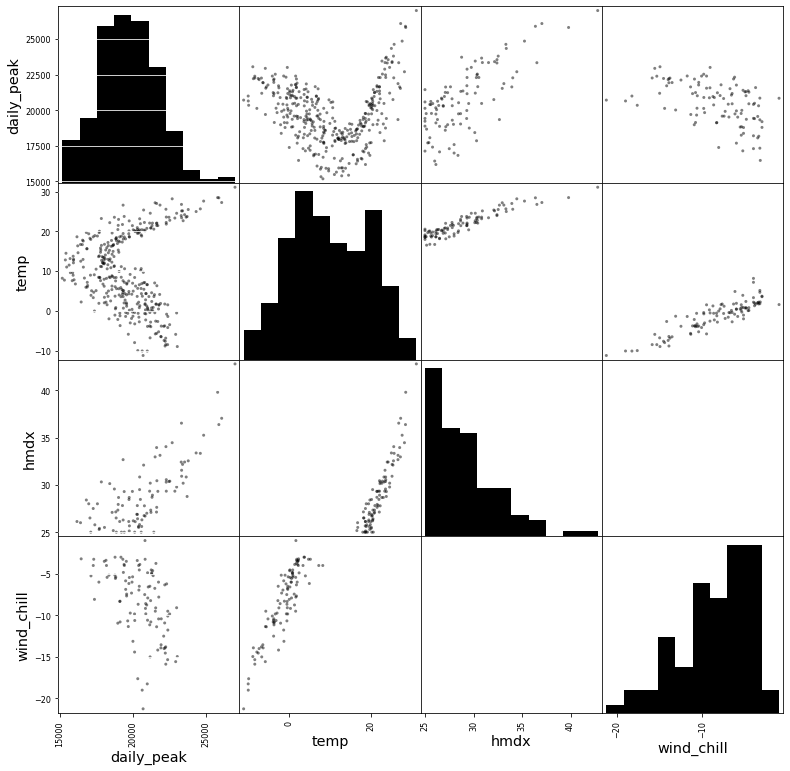

In [39]:
df = df2006[['daily_peak', 'temp', 'hmdx', 'wind_chill']].resample('D').mean()
df = df.loc[:, ['daily_peak', 'temp', 'hmdx', 'wind_chill']]
pd.plotting.scatter_matrix(df, figsize=(13,13));
plt.savefig('saved-images/17.PNG')

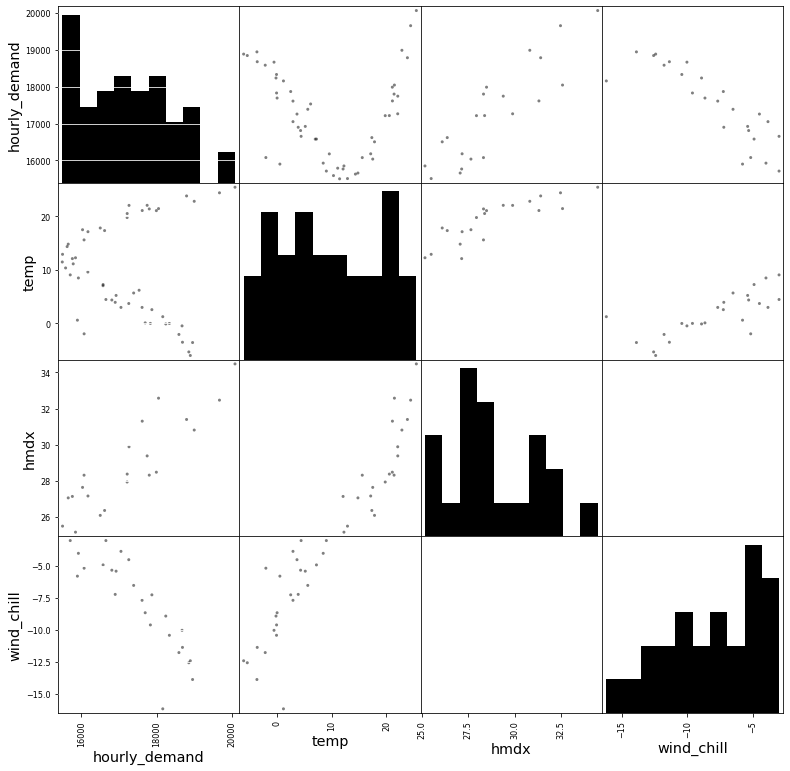

In [40]:
df = df2006[['hourly_demand', 'temp',  'hmdx', 'wind_chill']].resample('W').mean()
df = df.loc[:, ['hourly_demand', 'temp',  'hmdx', 'wind_chill']]
pd.plotting.scatter_matrix(df, figsize=(13,13));
plt.savefig('saved-images/18.PNG')

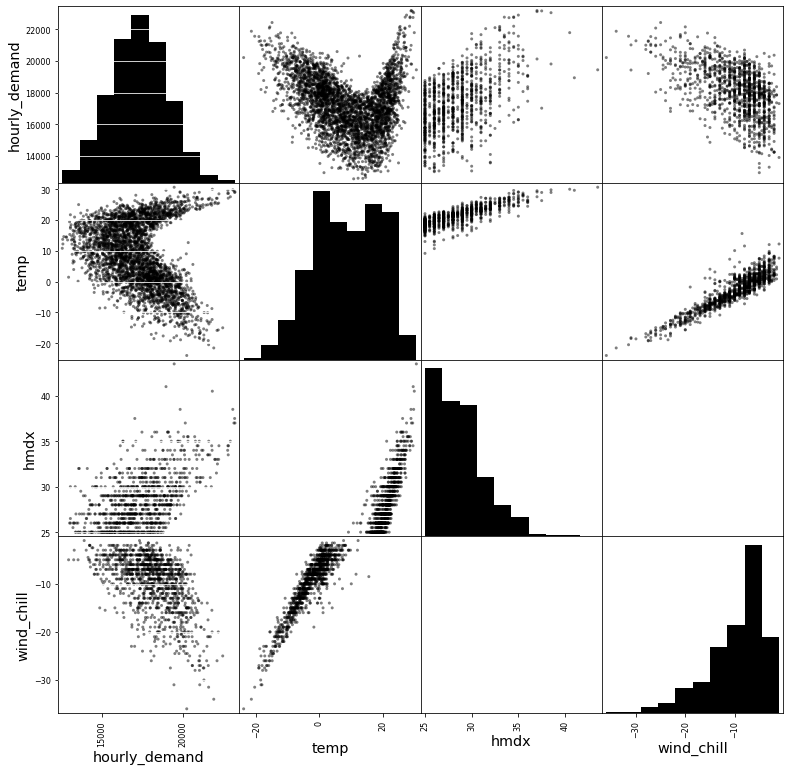

In [41]:
df = df_orig.loc['1994':'2003',['hourly_demand', 'temp',  'hmdx', 'wind_chill']]
df = df.resample('D').median()
df = df.loc[:, ['hourly_demand', 'temp',  'hmdx', 'wind_chill']]
pd.plotting.scatter_matrix(df, figsize=(13,13));
plt.savefig('saved-images/19.PNG')

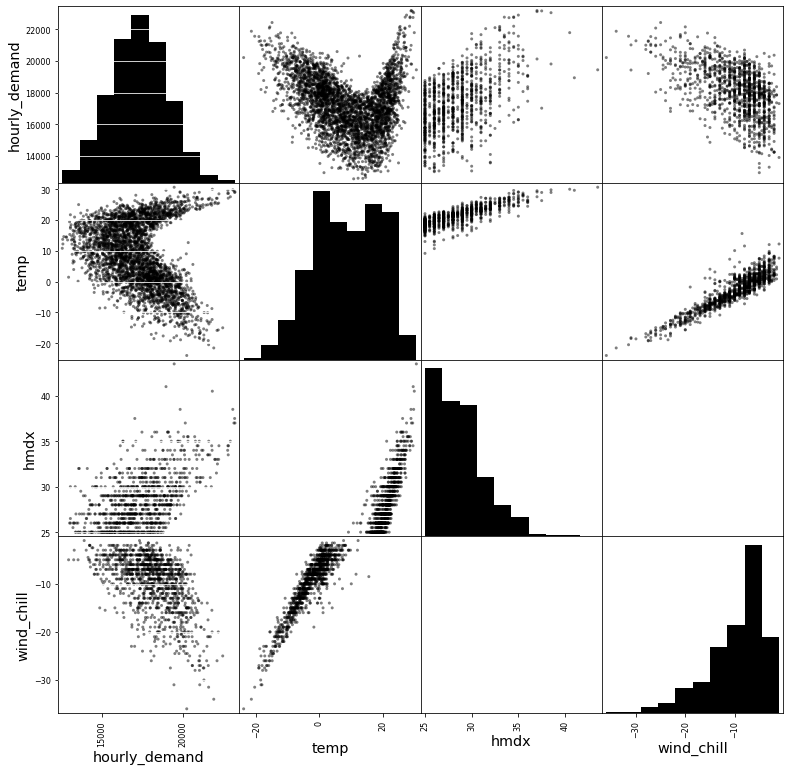

In [42]:
df = df_orig.loc['1994':'2003',['hourly_demand', 'temp',  'hmdx', 'wind_chill']]
df = df.resample('D').median()
df = df.loc[:, ['hourly_demand', 'temp',  'hmdx', 'wind_chill']]
pd.plotting.scatter_matrix(df, figsize=(13,13));
plt.savefig('saved-images/20.PNG')

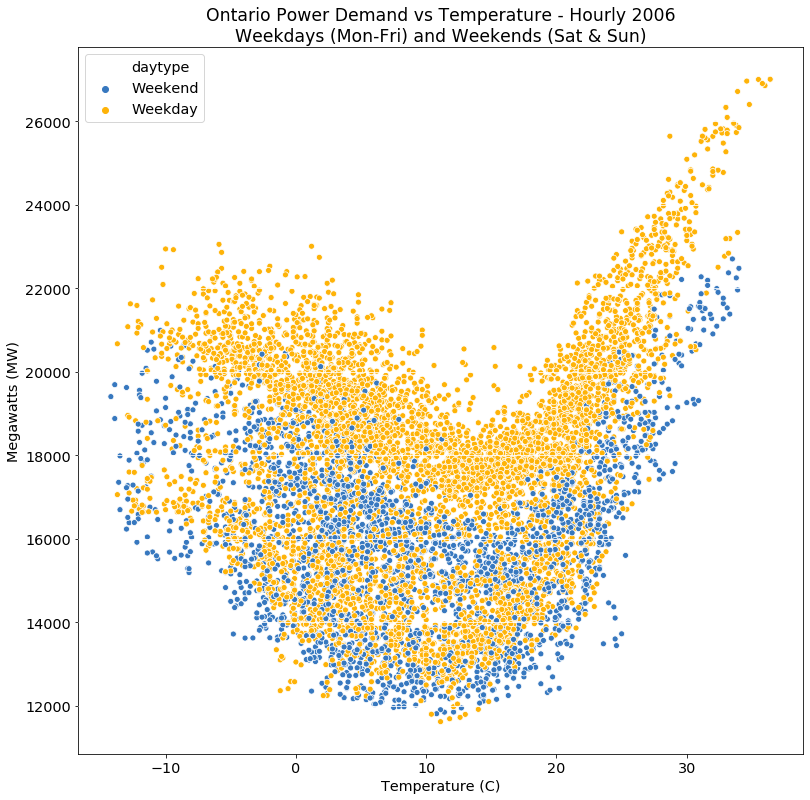

In [43]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))
fig, ax = plt.subplots(frameon=False, figsize=(13,13))
sns.scatterplot(x="temp", y="hourly_demand",
                hue="daytype",
                hue_order=['Weekend', 'Weekday'],
                data=df2006, ax=ax, legend='full')
#plt.title('')
ax.set_ylabel('Megawatts (MW)')
ax.set_xlabel('Temperature (C)')
ax.set_title('Ontario Power Demand vs Temperature - Hourly 2006\nWeekdays (Mon-Fri) and Weekends (Sat & Sun)')
plt.savefig('saved-images/ontario-power-demand-vs-temperature-hourly-2006-scatterplot.PNG')
plt.show();

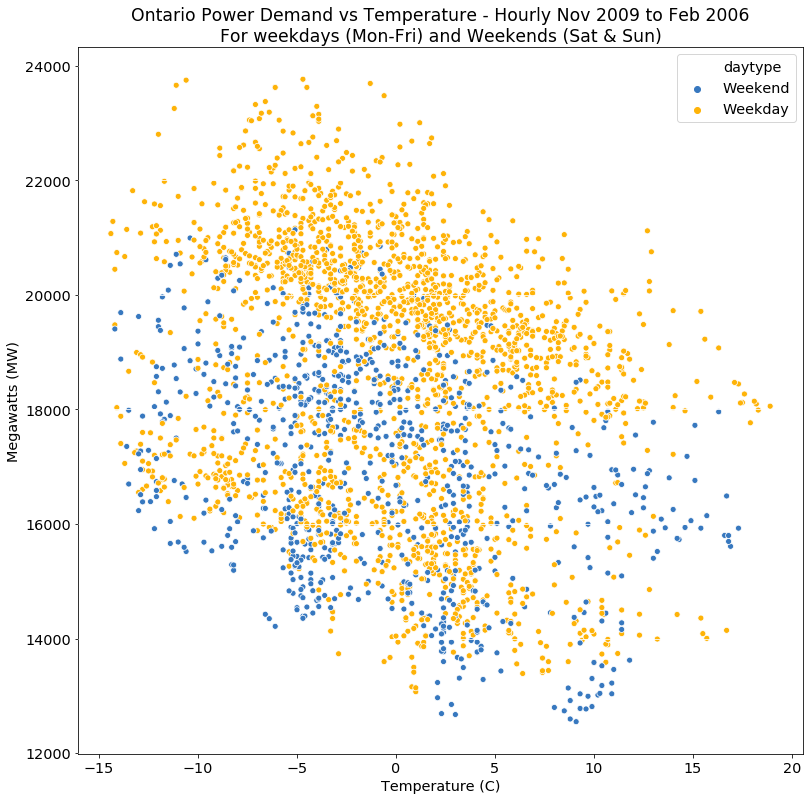

In [48]:
fig, ax = plt.subplots(frameon=False, figsize=(13,13))
sns.scatterplot(x="temp", y="hourly_demand",
                hue="daytype",
                hue_order=['Weekend', 'Weekday'],
                data=df_orig.loc['2005-11' : '2006-02', :], ax=ax, legend='full')
ax.set_ylabel('Megawatts (MW)')
ax.set_xlabel('Temperature (C)')
ax.set_title('Ontario Power Demand vs Temperature - Hourly Nov 2009 to Feb 2006\nFor weekdays (Mon-Fri) and Weekends (Sat & Sun)')
plt.savefig('saved-images/ontario-power-demand-vs-temperature-hourly-nov2009-feb2006-scatterplot.PNG')
plt.show();

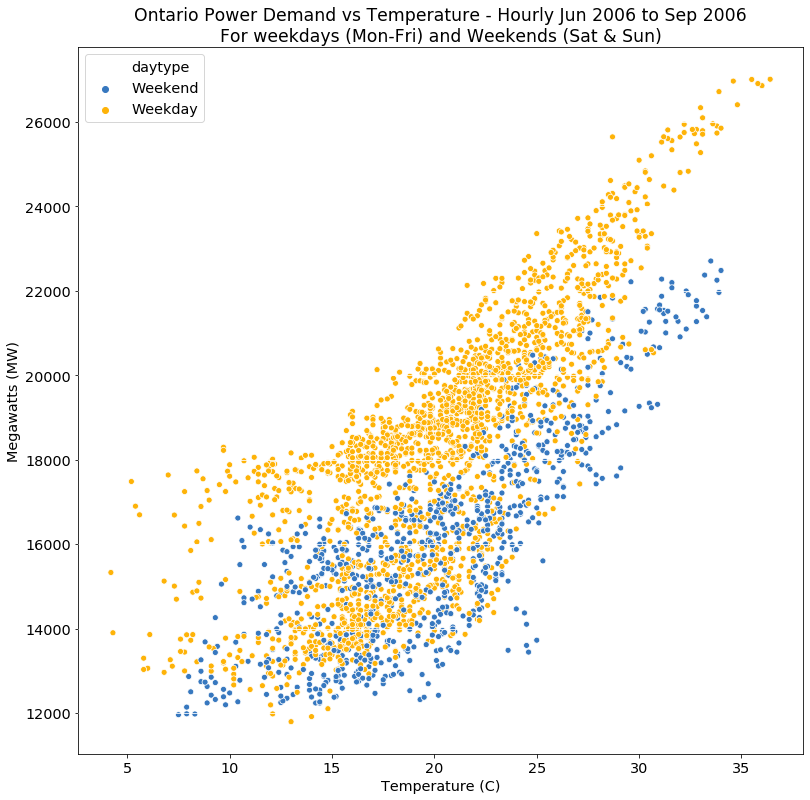

In [50]:
fig, ax = plt.subplots(frameon=False, figsize=(13,13))
sns.scatterplot(x="temp", y="hourly_demand",
                hue="daytype",
                hue_order=['Weekend', 'Weekday'],
                data=df_orig.loc['2006-06' : '2006-09', :], ax=ax, legend='full')
plt.legend()
ax.set_ylabel('Megawatts (MW)')
ax.set_xlabel('Temperature (C)')
ax.set_title('Ontario Power Demand vs Temperature - Hourly Jun 2006 to Sep 2006\nFor weekdays (Mon-Fri) and Weekends (Sat & Sun)')
plt.savefig('saved-images/ontario-power-demand-vs-temperature-hourly-jun2006-sep2006-scatterplot.PNG')
plt.show();

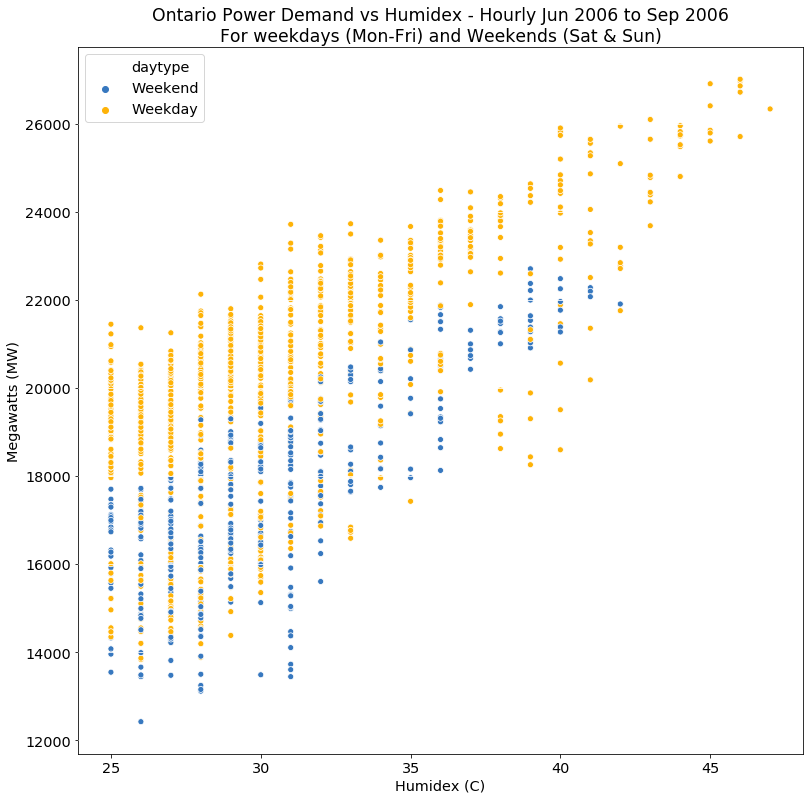

In [46]:
fig, ax = plt.subplots(frameon=False, figsize=(13,13))
sns.scatterplot(x="hmdx", y="hourly_demand",
                hue="daytype",
                hue_order=['Weekend', 'Weekday'],
                data=df2006, ax=ax, legend='full')
plt.legend()
ax.set_ylabel('Megawatts (MW)')
ax.set_xlabel('Humidex (C)')
ax.set_title('Ontario Power Demand vs Humidex - Hourly Jun 2006 to Sep 2006\nFor weekdays (Mon-Fri) and Weekends (Sat & Sun)')
plt.savefig('saved-images/ontario-power-demand-vs-humidex-hourly-jun2006-sep2006-scatterplot.PNG')
plt.show();

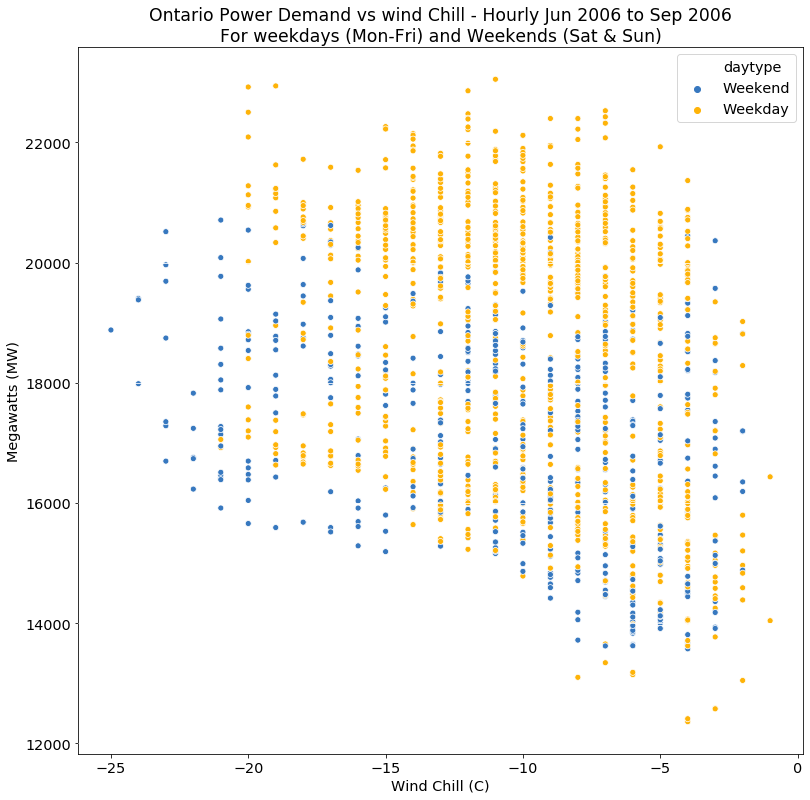

In [47]:
fig, ax = plt.subplots(frameon=False, figsize=(13,13))
sns.scatterplot(x="wind_chill", y="hourly_demand",
                hue="daytype",
                hue_order=['Weekend', 'Weekday'],
                data=df2006, ax=ax, legend='full')
plt.legend()
ax.set_ylabel('Megawatts (MW)')
ax.set_xlabel('Wind Chill (C)')
ax.set_title('Ontario Power Demand vs wind Chill - Hourly Jun 2006 to Sep 2006\nFor weekdays (Mon-Fri) and Weekends (Sat & Sun)')
plt.savefig('saved-images/ontario-power-demand-vs-windchill-hourly-jun2006-sep2006-scatterplot.PNG')
plt.show();